# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Tan Bima Wiragama
- Email: tanbimawiragama@gmail.com
- Id Dicoding: 34388

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os

# Mengatur gaya default untuk plot seaborn agar lebih menarik
sns.set_theme(style="whitegrid")

### Menyiapkan data yang akan diguankan

In [ ]:
try:
    df = pd.read_csv('data.csv', delimiter=';')
    print("Data loaded successfully!")
    print("Shape of the dataframe:", df.shape)
    print("\nFirst 5 rows of the dataframe:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

Data loaded successfully!
Shape of the dataframe: (4424, 37)

First 5 rows of the dataframe:
   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                        

## Data Understanding

In [ ]:
print("\n--- Data Understanding ---")
print("\nInfo Dataset:")
df.info()

print("\nStatistik Deskriptif (termasuk kolom non-numerik):")
print(df.describe(include='all'))

print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Menggunakan kolom 'Status' sebagai target
if 'Status' in df.columns:
    print("\nDistribusi Kolom Target ('Status'):")
    print(df['Status'].value_counts())
else:
    print("\nError: Kolom 'Status' TIDAK DITEMUKAN dalam dataset.")
    print("Harap periksa kembali file data Anda. Berdasarkan pengecekan terakhir, seharusnya kolom 'Status' ada.")
    exit()


--- Data Understanding ---

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualificatio

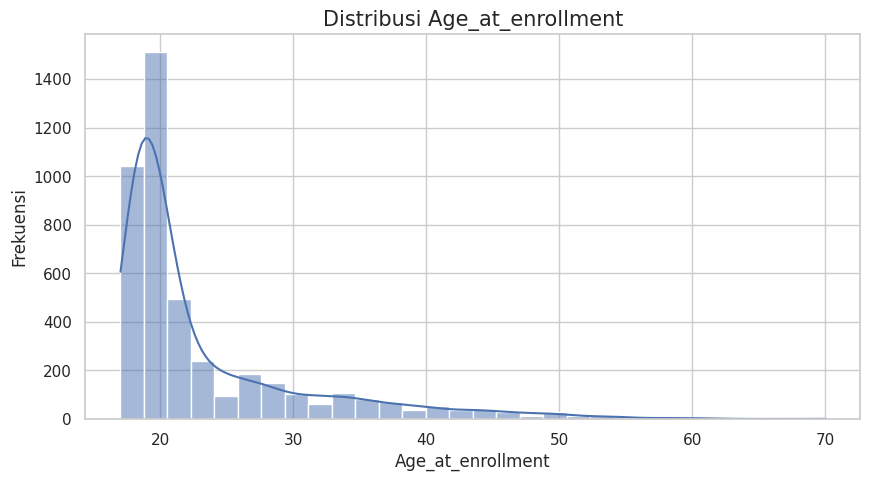

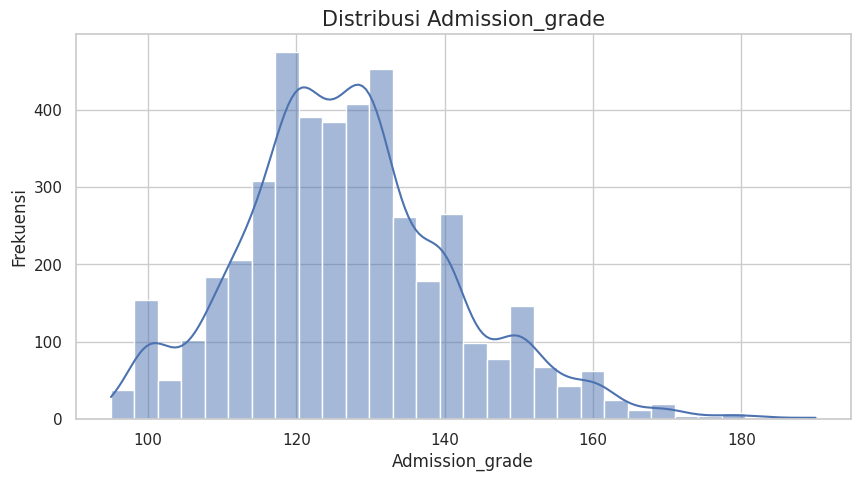

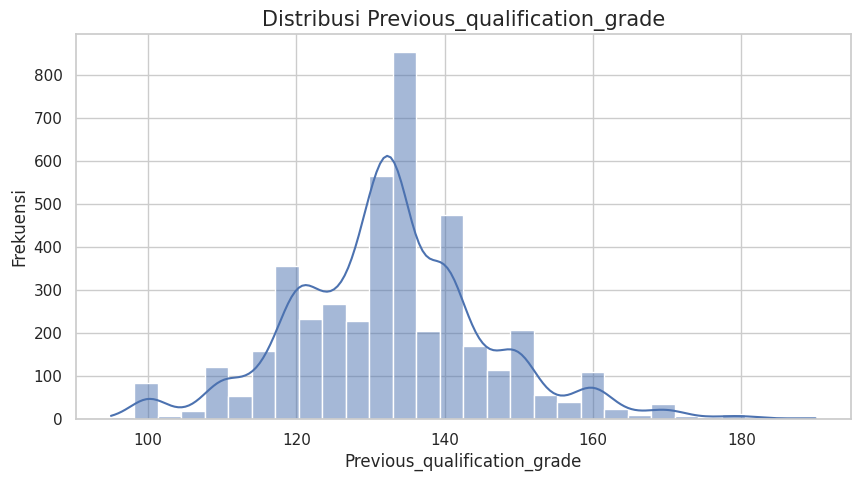

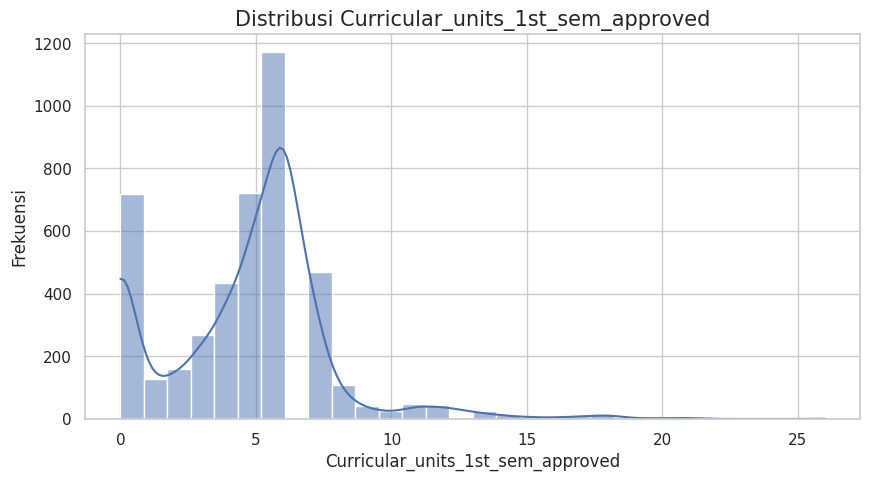

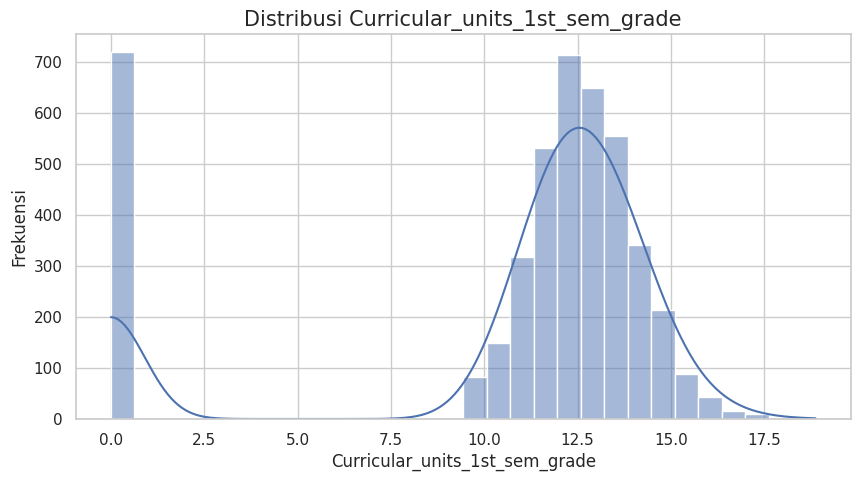

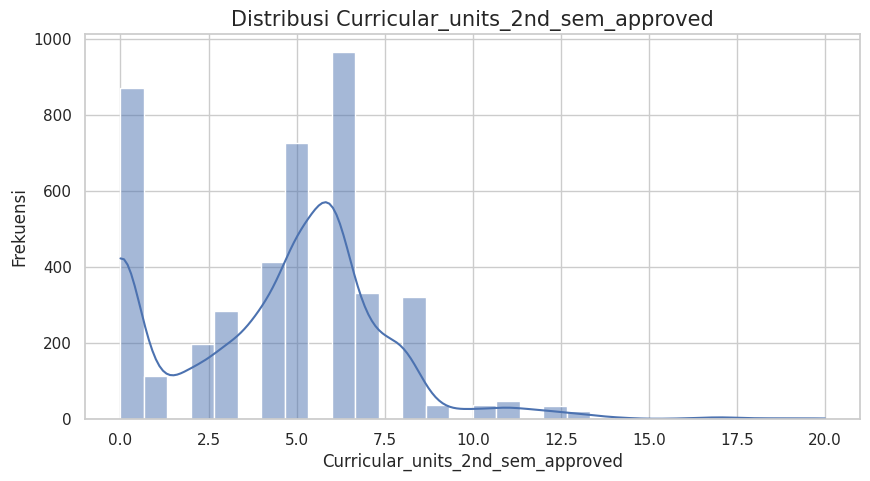

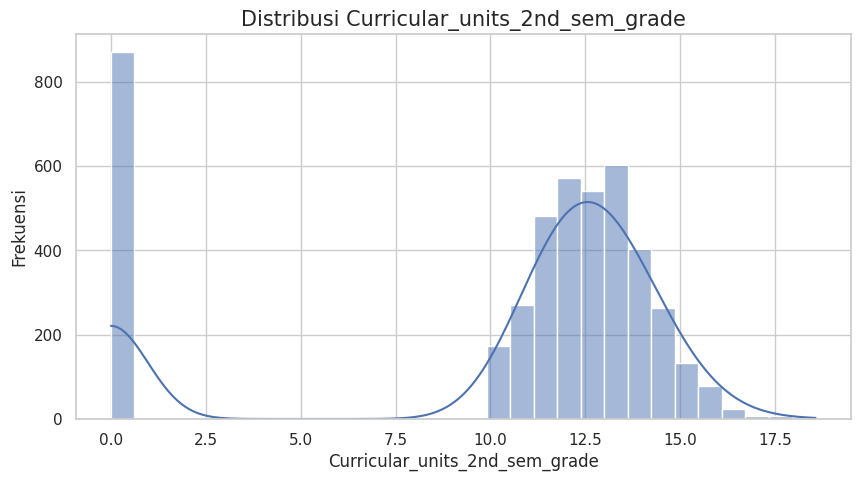

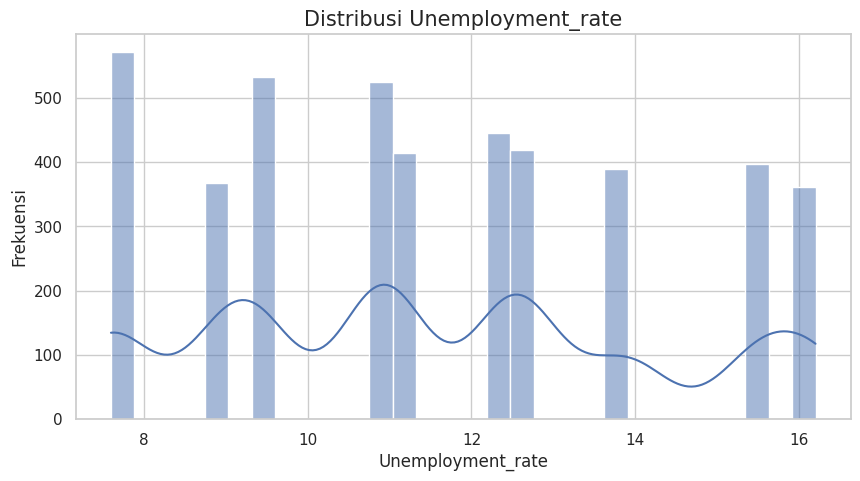

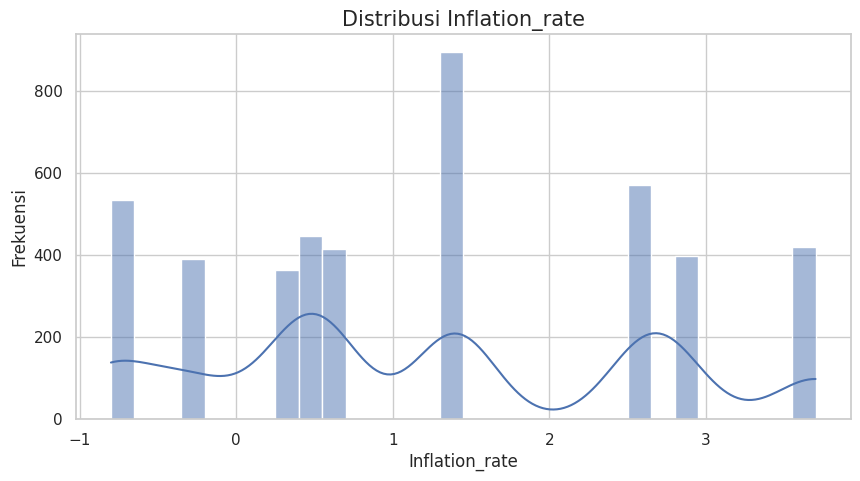

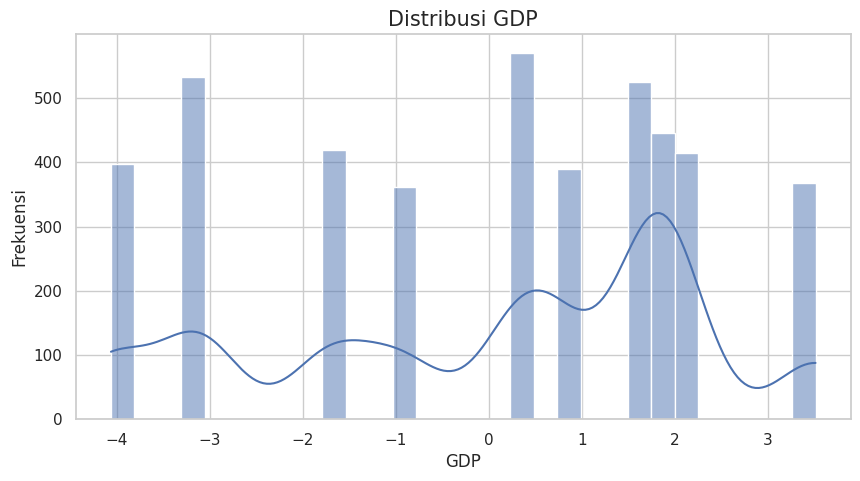

In [ ]:
# Contoh fitur numerik yang relevan
numerical_features_to_explore = [
    'Age_at_enrollment', 'Admission_grade',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]

# Membuat histogram dan KDE plot untuk setiap fitur numerik
for col in numerical_features_to_explore:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribusi {col}', fontsize=15)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.show()
    else:
        print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")

<ipython-input-14-edafa72ee284>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


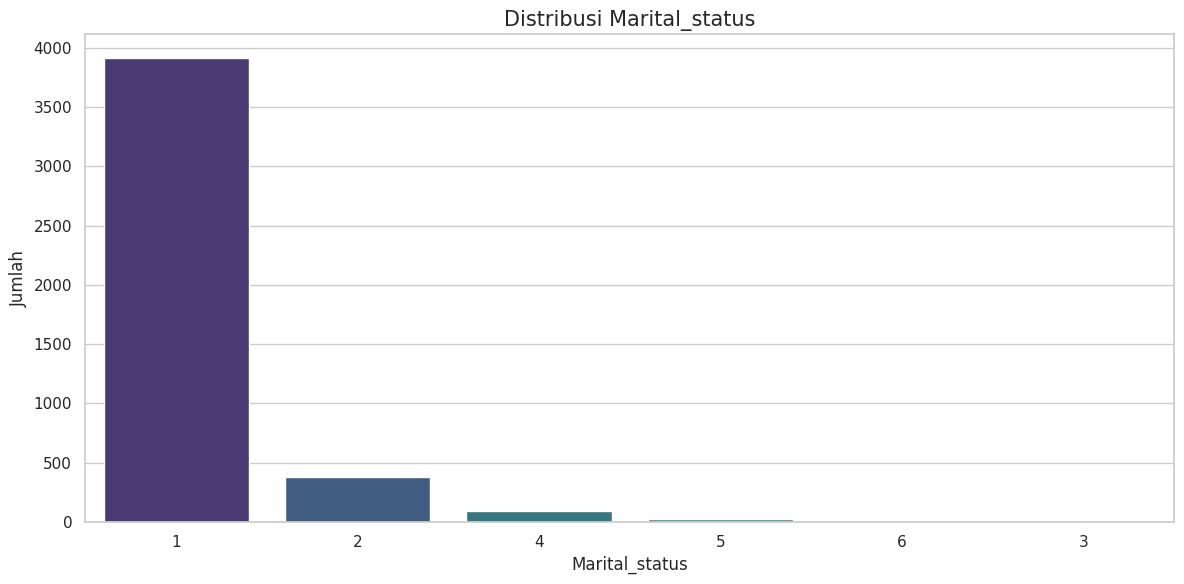

<ipython-input-14-edafa72ee284>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().iloc[:10].index, palette="viridis") # Misal 10 course teratas


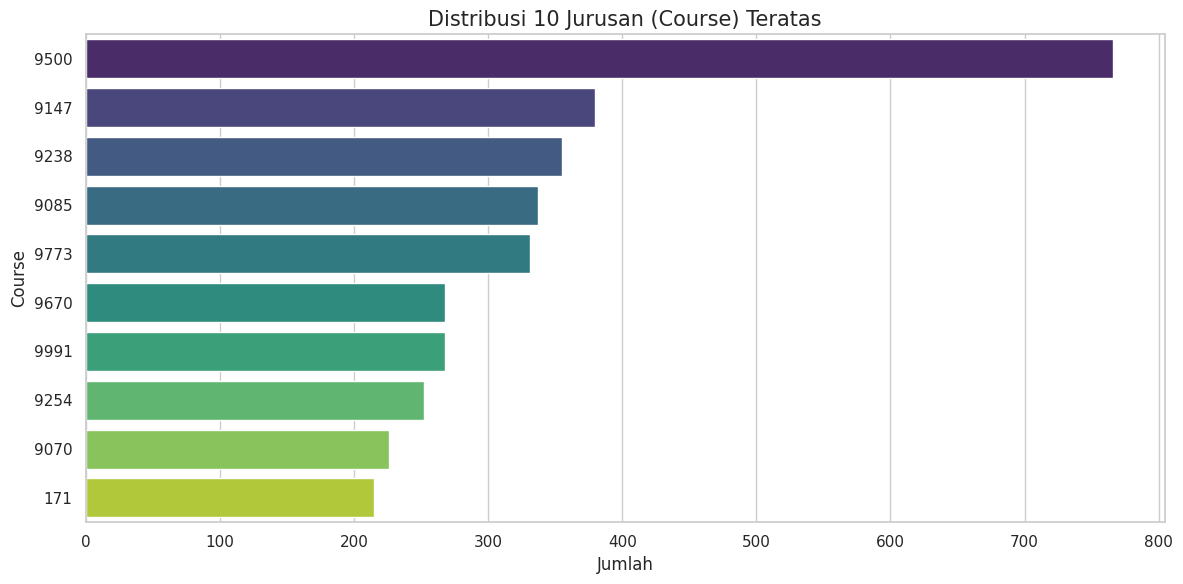

<ipython-input-14-edafa72ee284>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


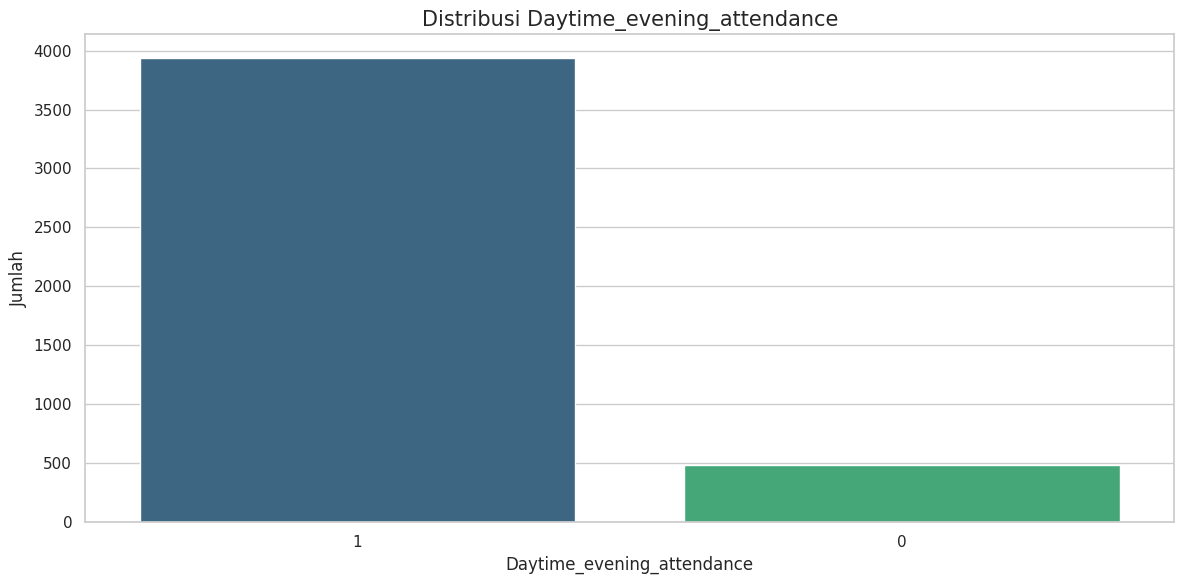

<ipython-input-14-edafa72ee284>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().iloc[:15].index, palette="viridis")


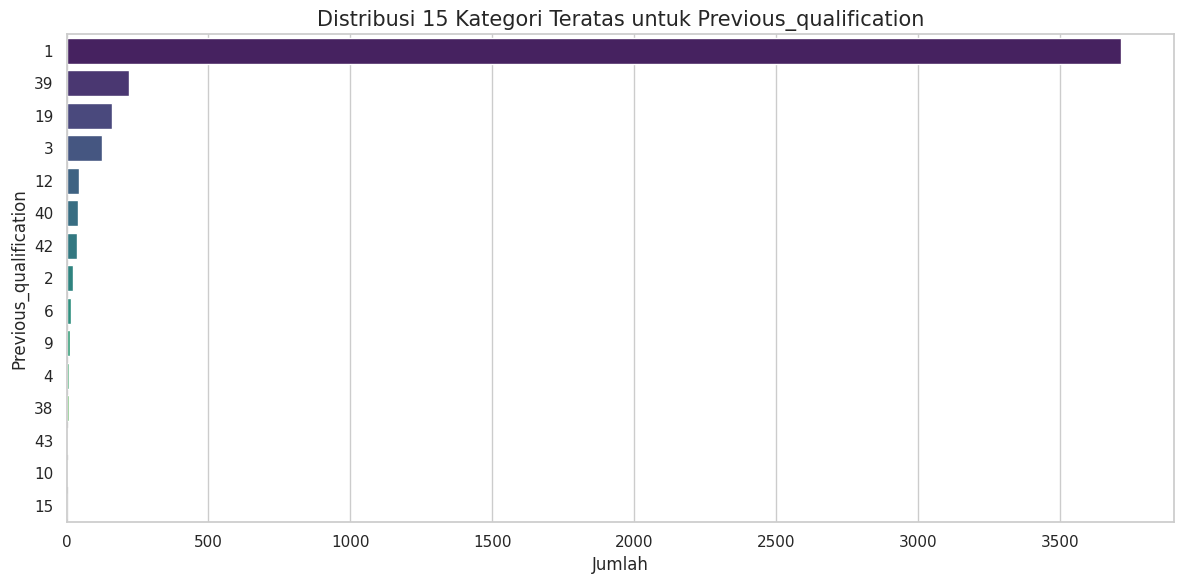

<ipython-input-14-edafa72ee284>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().iloc[:15].index, palette="viridis")


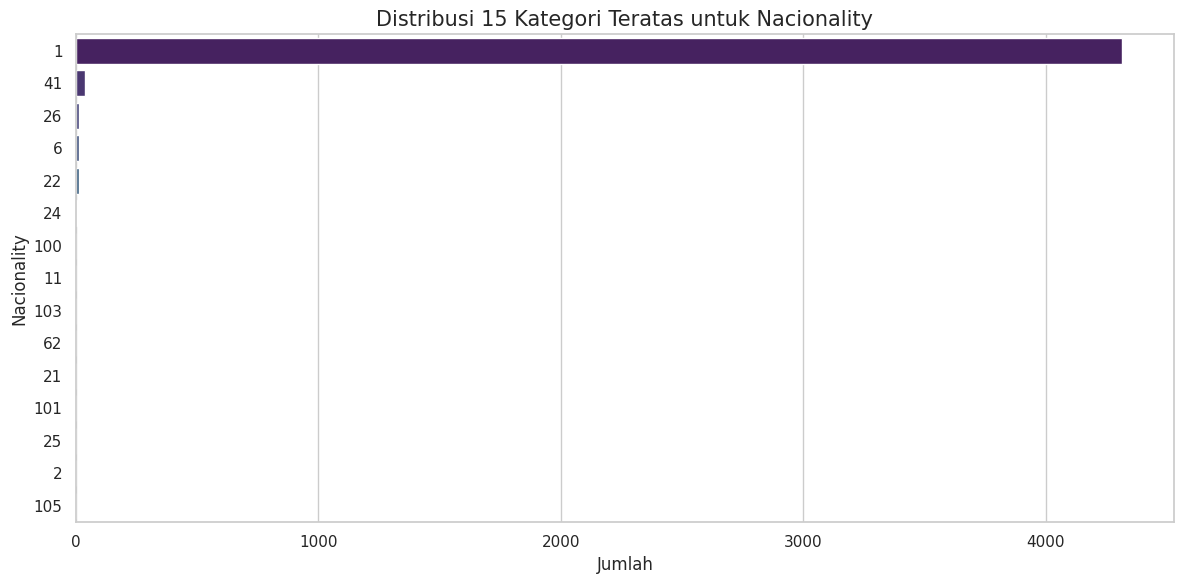

<ipython-input-14-edafa72ee284>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().iloc[:15].index, palette="viridis")


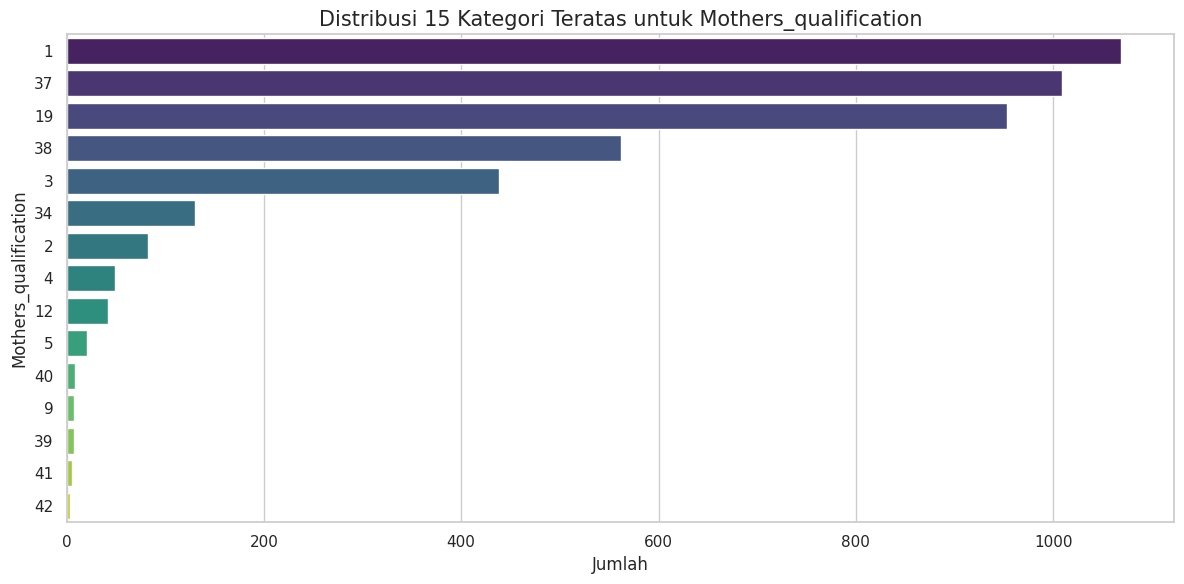

<ipython-input-14-edafa72ee284>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().iloc[:15].index, palette="viridis")


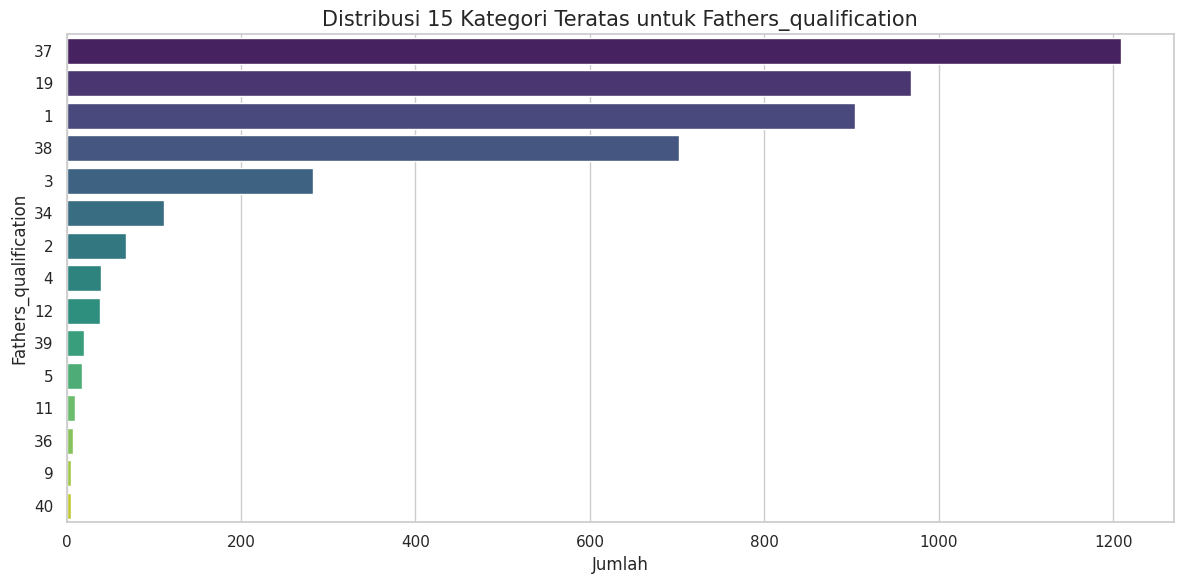

<ipython-input-14-edafa72ee284>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().iloc[:15].index, palette="viridis")


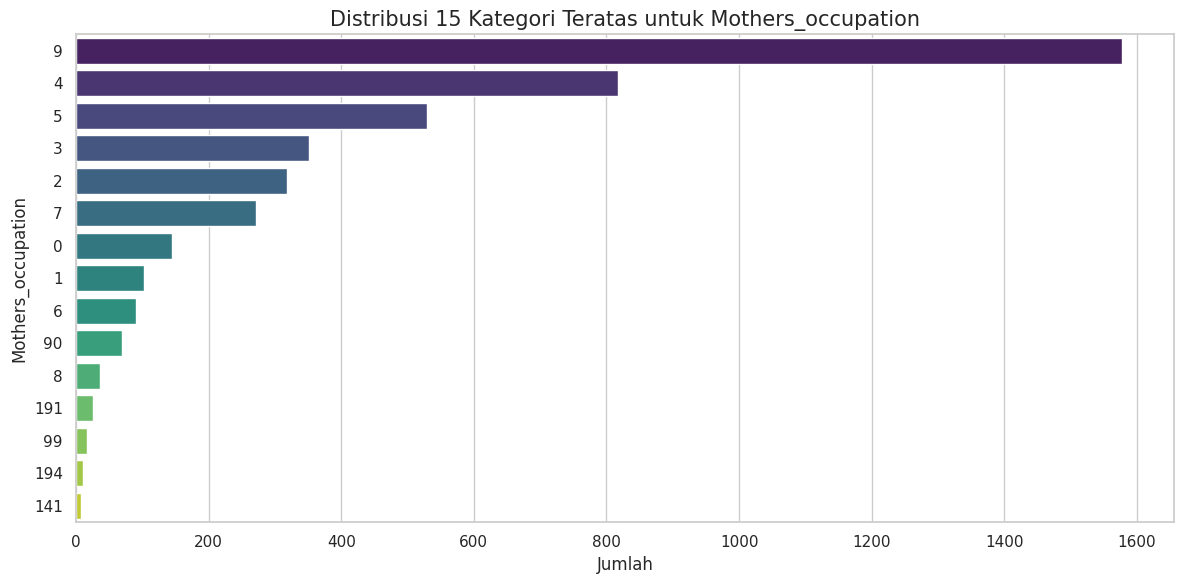

<ipython-input-14-edafa72ee284>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().iloc[:15].index, palette="viridis")


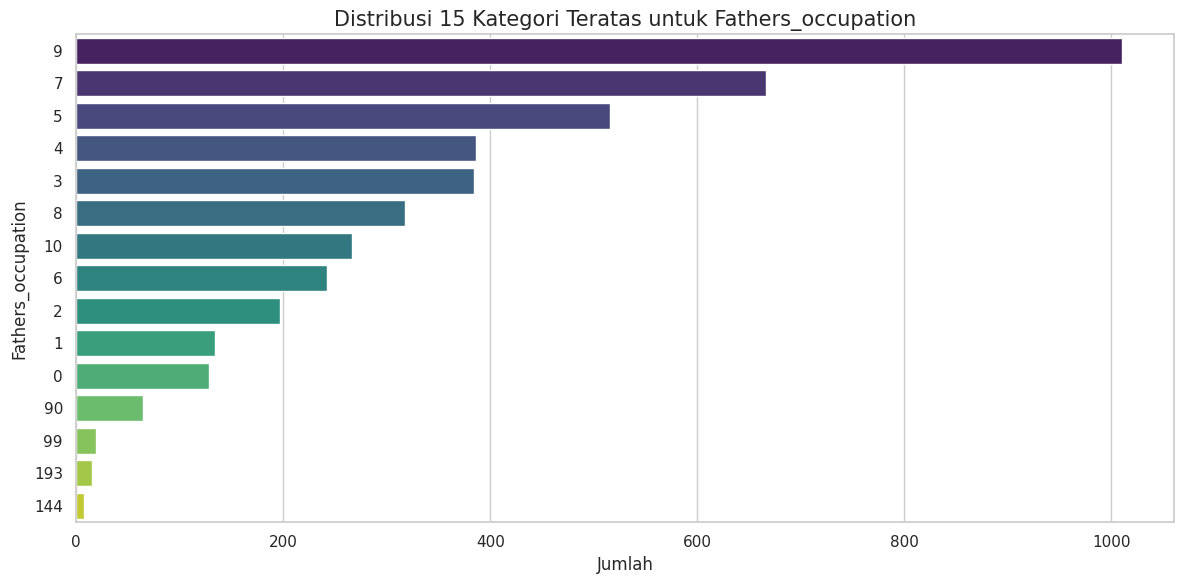

<ipython-input-14-edafa72ee284>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


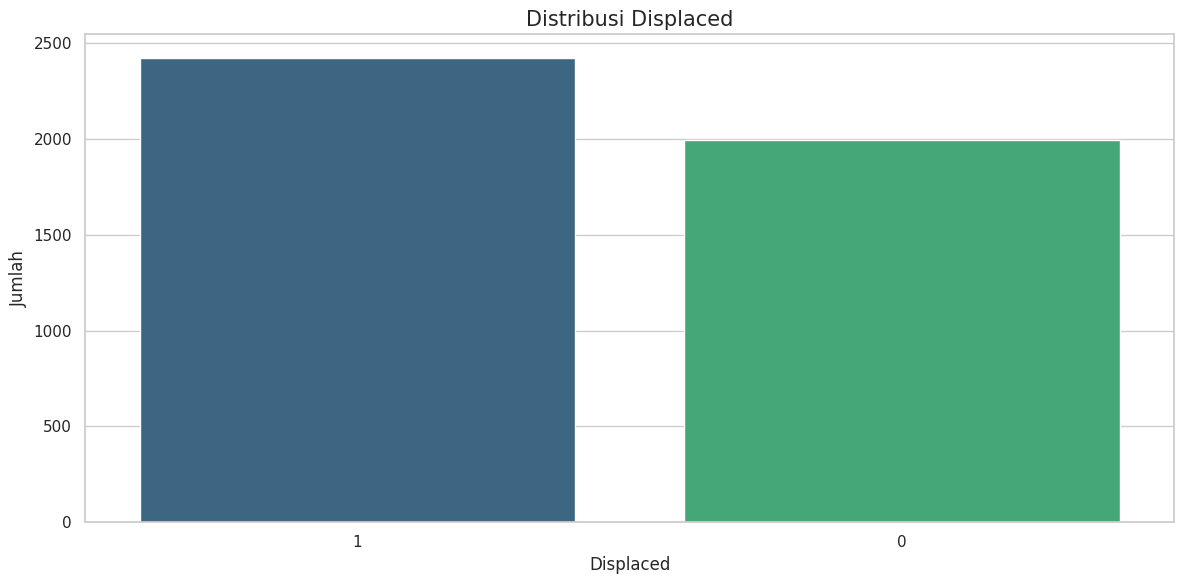

<ipython-input-14-edafa72ee284>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


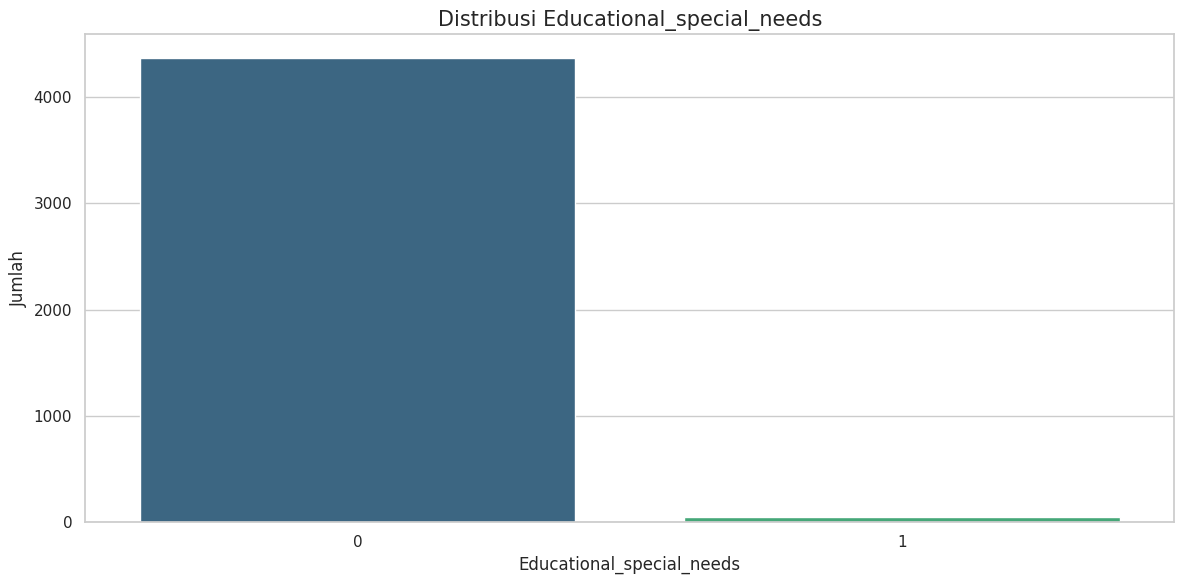

<ipython-input-14-edafa72ee284>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


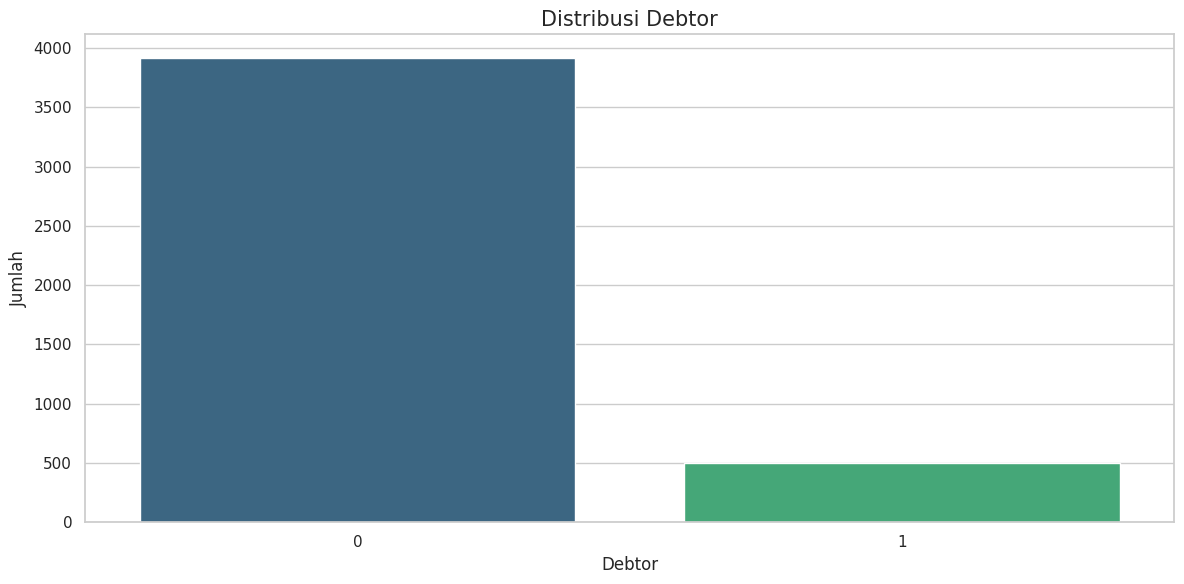

<ipython-input-14-edafa72ee284>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


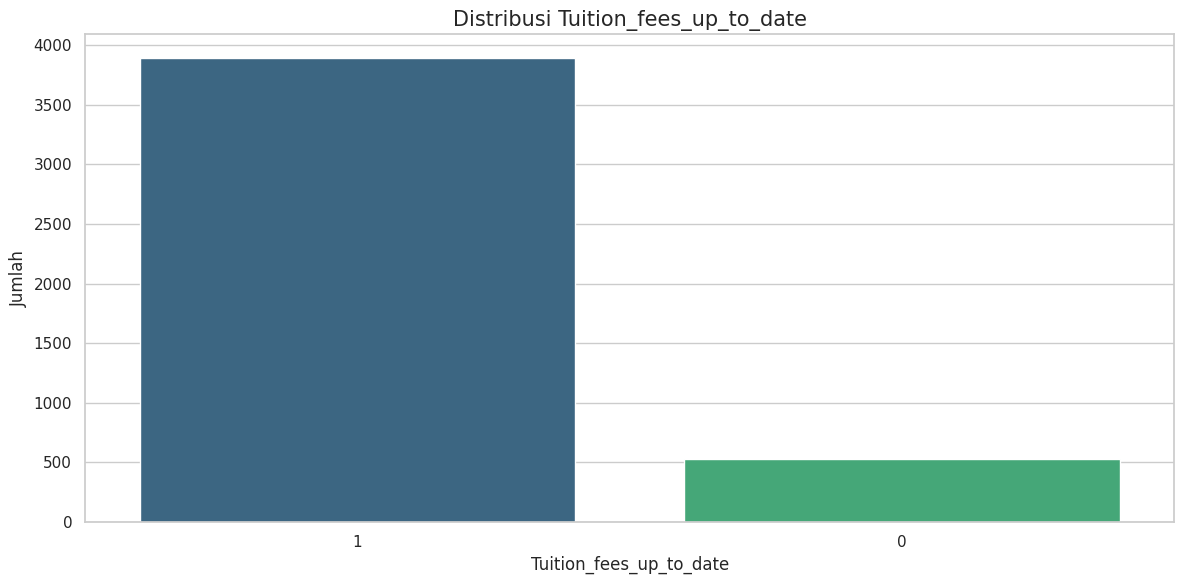

<ipython-input-14-edafa72ee284>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


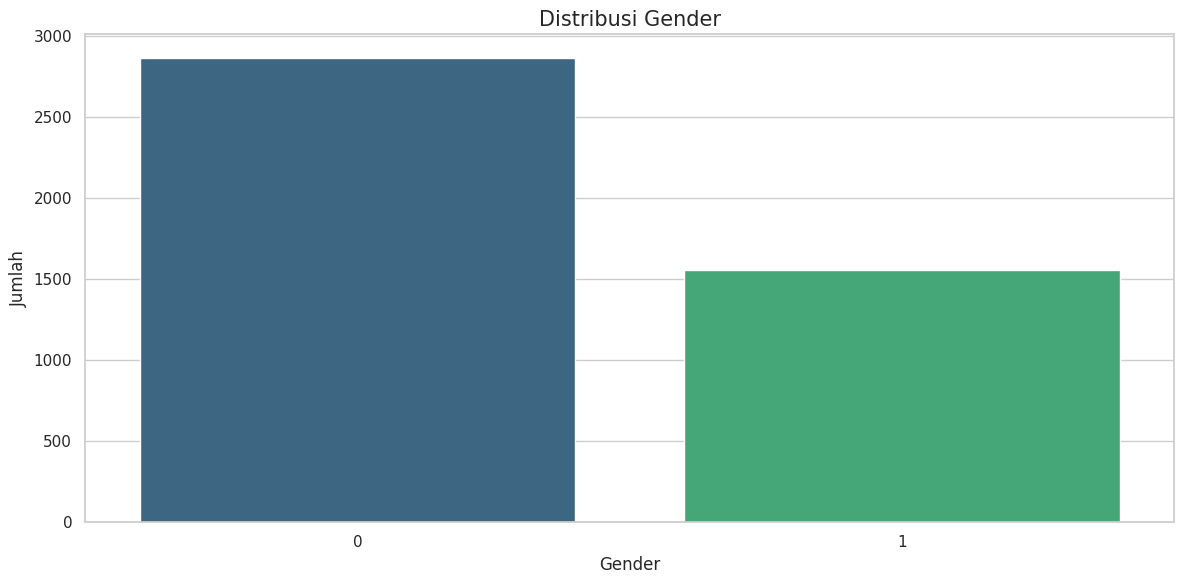

<ipython-input-14-edafa72ee284>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


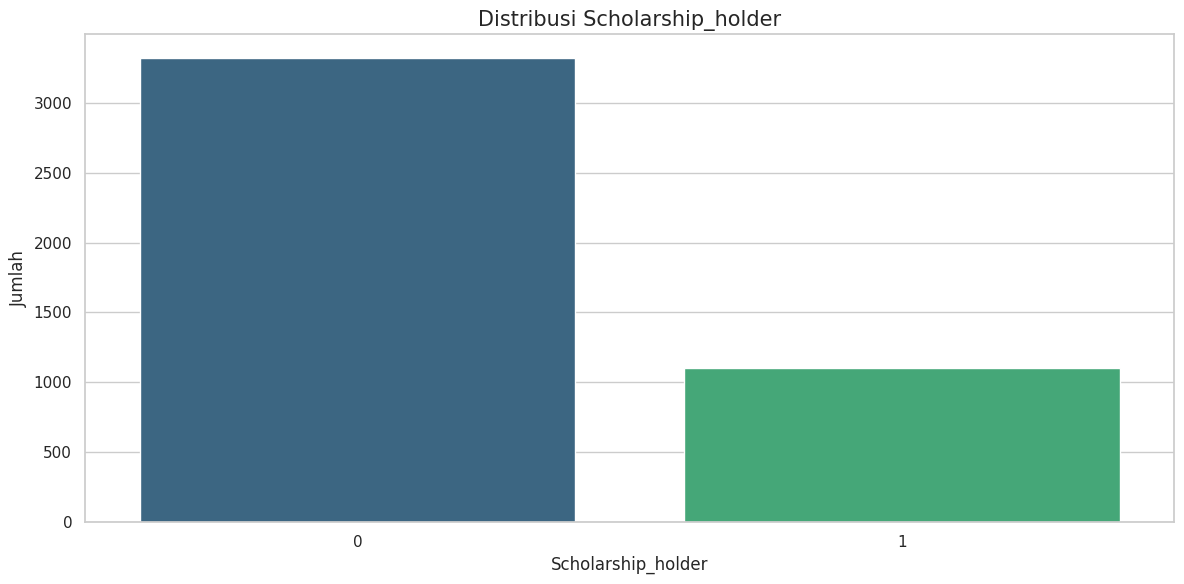

<ipython-input-14-edafa72ee284>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


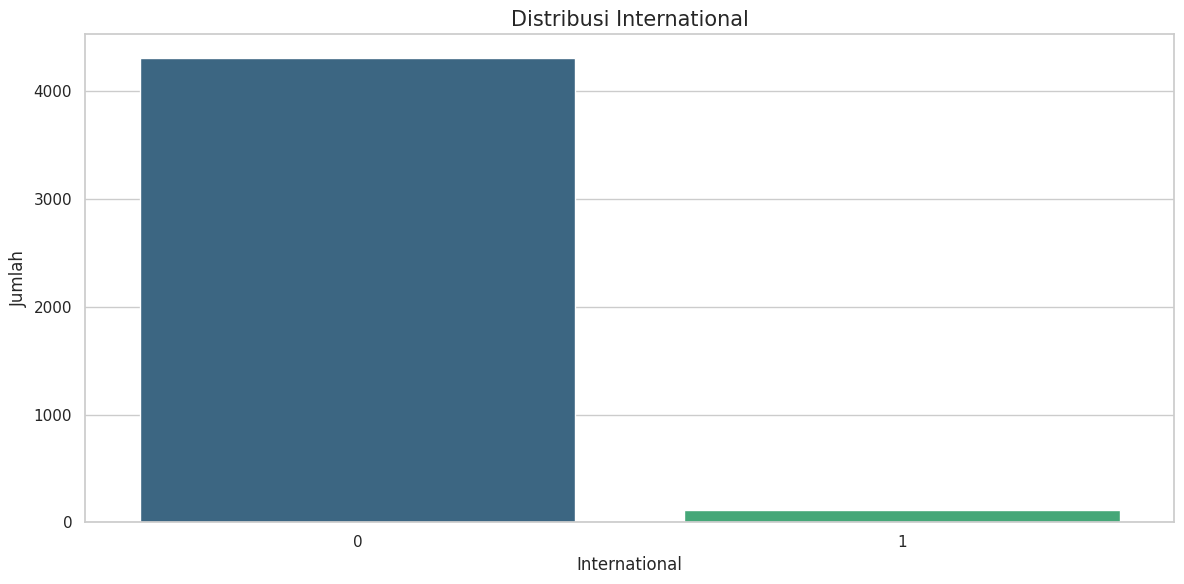

In [ ]:
# Ingat, beberapa kolom numerik di dataset ini sebenarnya adalah representasi kategori.
# Untuk EDA awal, kita bisa lihat yang sudah jelas kategorikal atau yang memiliki sedikit nilai unik.
categorical_features_to_explore = [
    'Marital_status', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality',
    'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

# Membuat countplot untuk setiap fitur kategorikal
for col in categorical_features_to_explore:
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        # Jika jumlah kategori terlalu banyak (misal 'Course'), tampilkan N teratas saja
        if df[col].nunique() > 15 and col != 'Course': # Batasi untuk kolom selain Course yang mungkin banyak
             sns.countplot(y=df[col], order=df[col].value_counts().iloc[:15].index, palette="viridis")
             plt.title(f'Distribusi 15 Kategori Teratas untuk {col}', fontsize=15)
        elif col == 'Course' and df[col].nunique() > 15:
             sns.countplot(y=df[col], order=df[col].value_counts().iloc[:10].index, palette="viridis") # Misal 10 course teratas
             plt.title(f'Distribusi 10 Jurusan (Course) Teratas', fontsize=15)
        else:
            sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
            plt.title(f'Distribusi {col}', fontsize=15)

        plt.xlabel('Jumlah', fontsize=12) if df[col].nunique() > 15 else plt.xlabel(col, fontsize=12)
        plt.ylabel(col, fontsize=12) if df[col].nunique() > 15 else plt.ylabel('Jumlah', fontsize=12)
        plt.xticks(rotation=45, ha='right') if df[col].nunique() <= 15 and df[col].dtype == 'object' else None
        plt.tight_layout()
        plt.show()
    else:
        print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


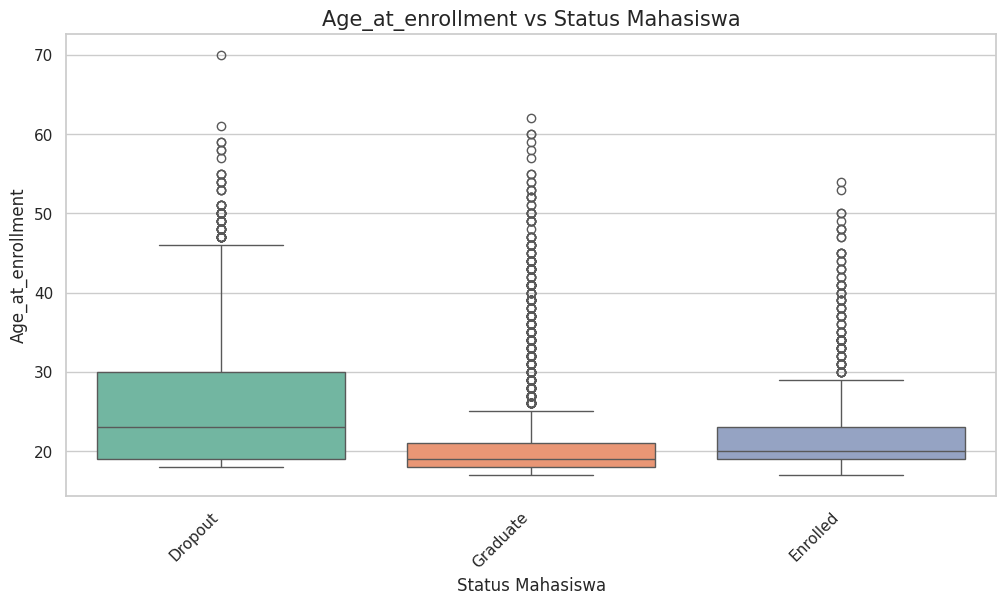

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


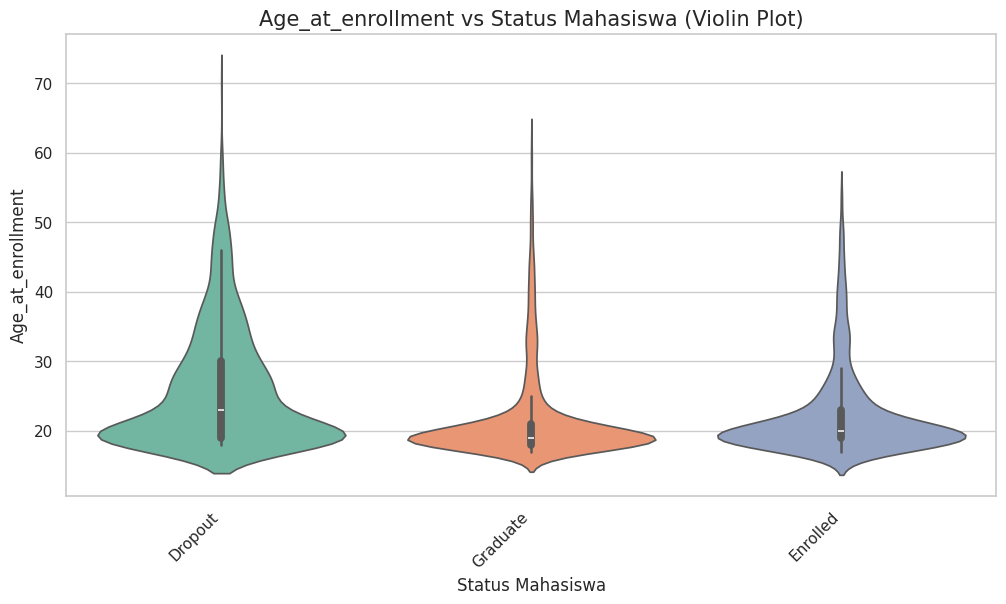

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


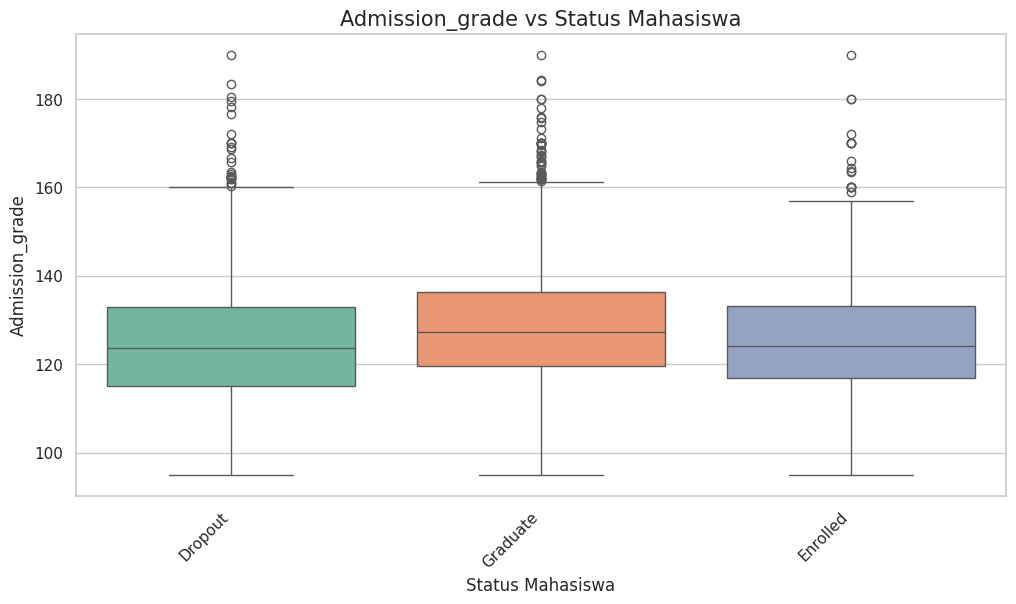

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


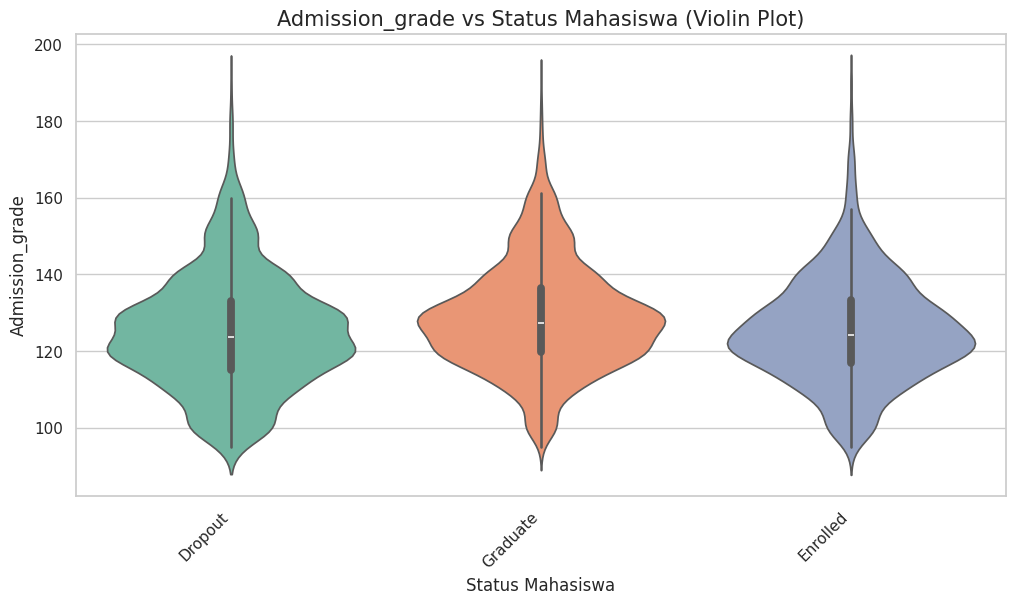

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


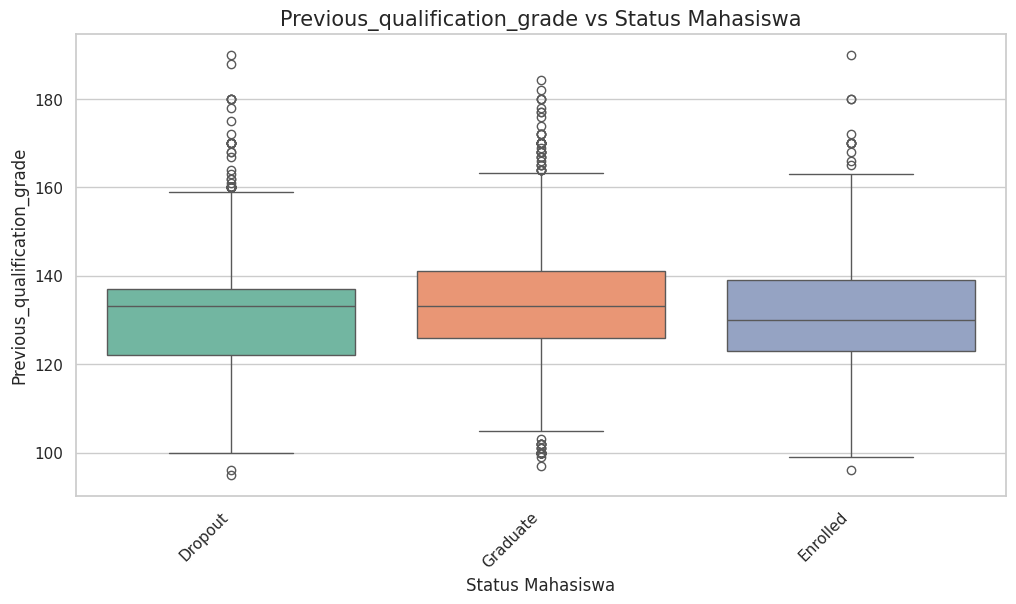

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


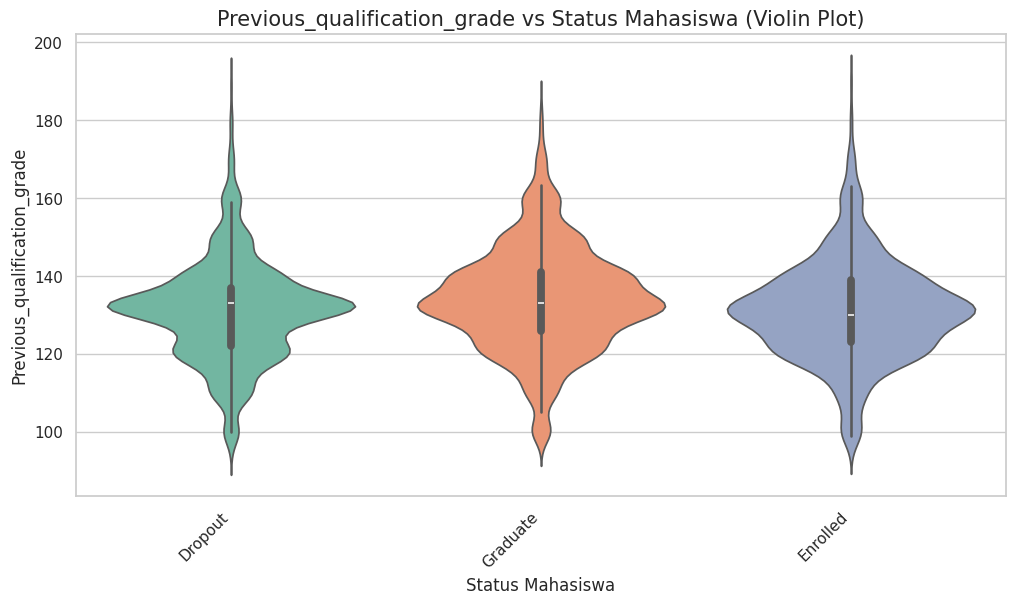

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


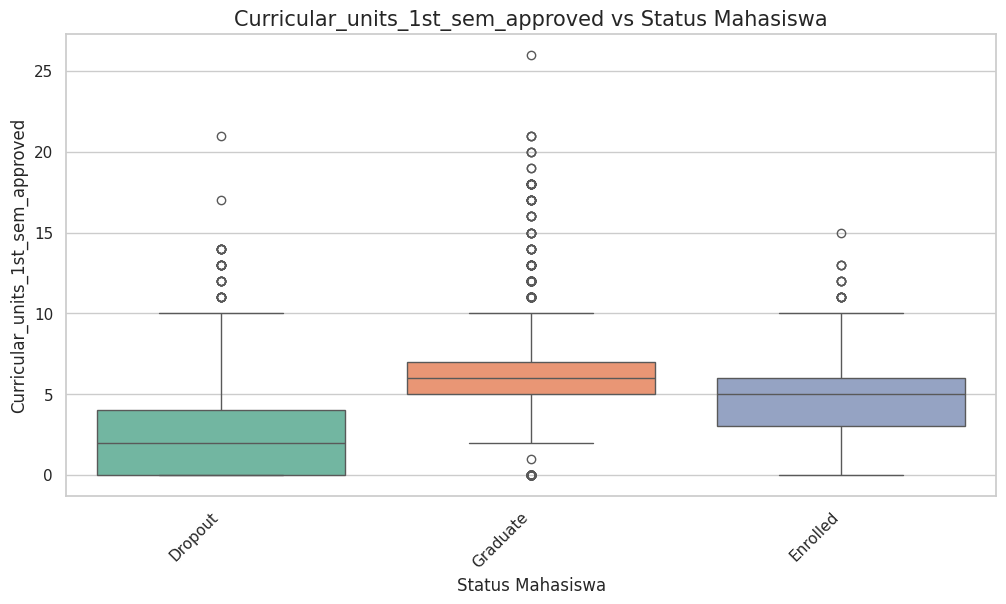

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


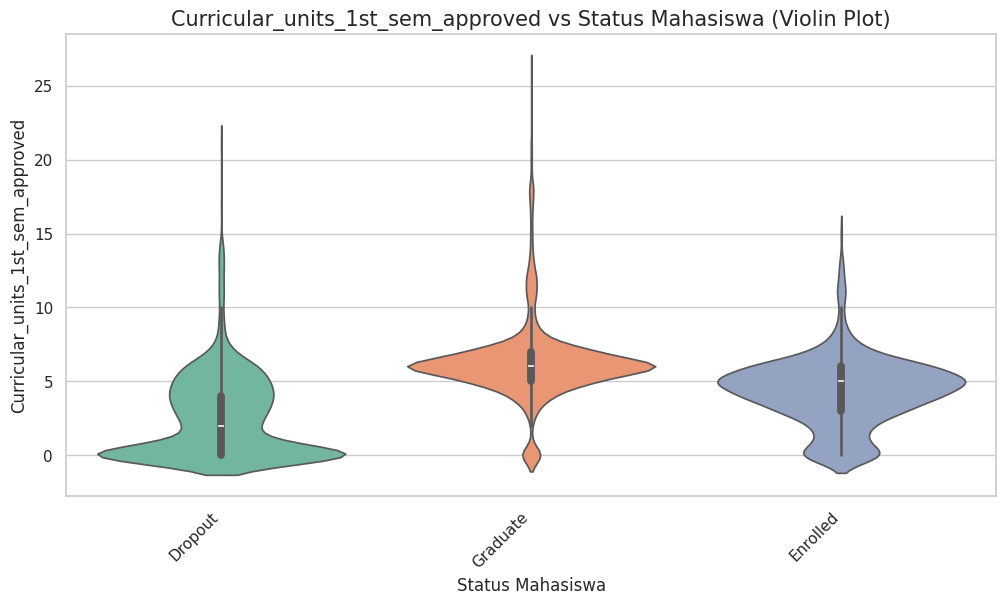

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


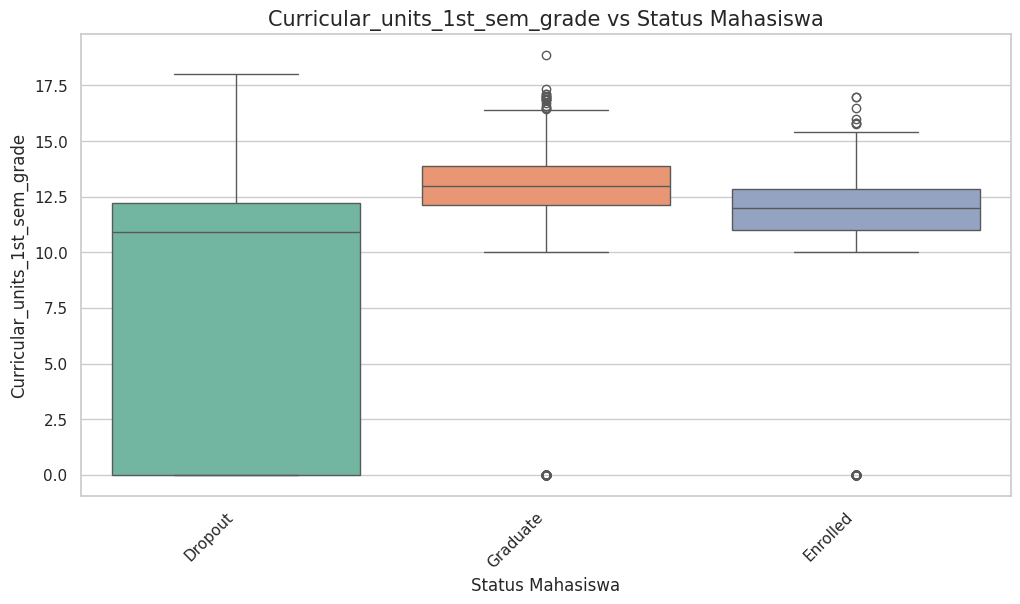

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


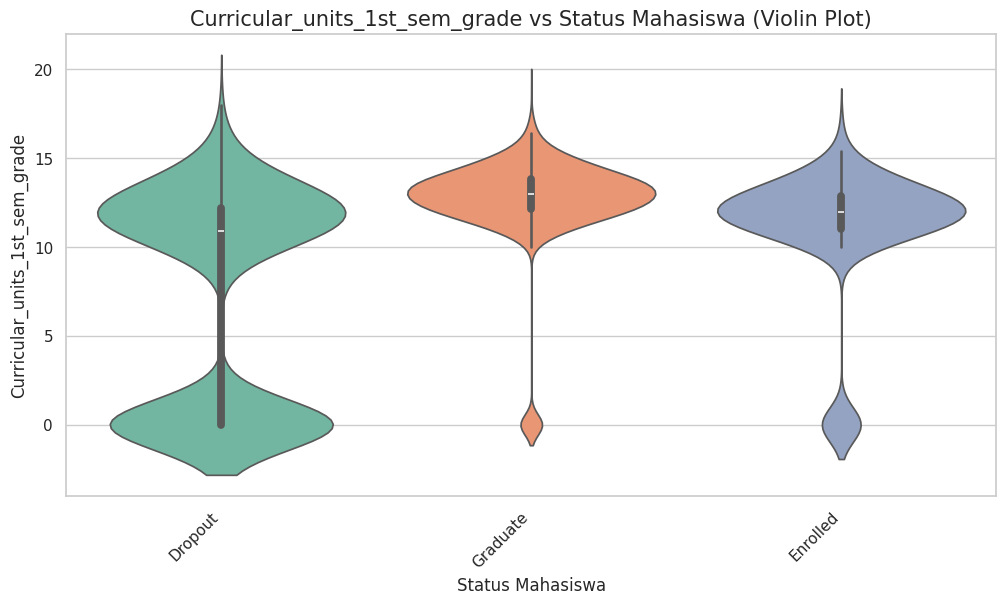

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


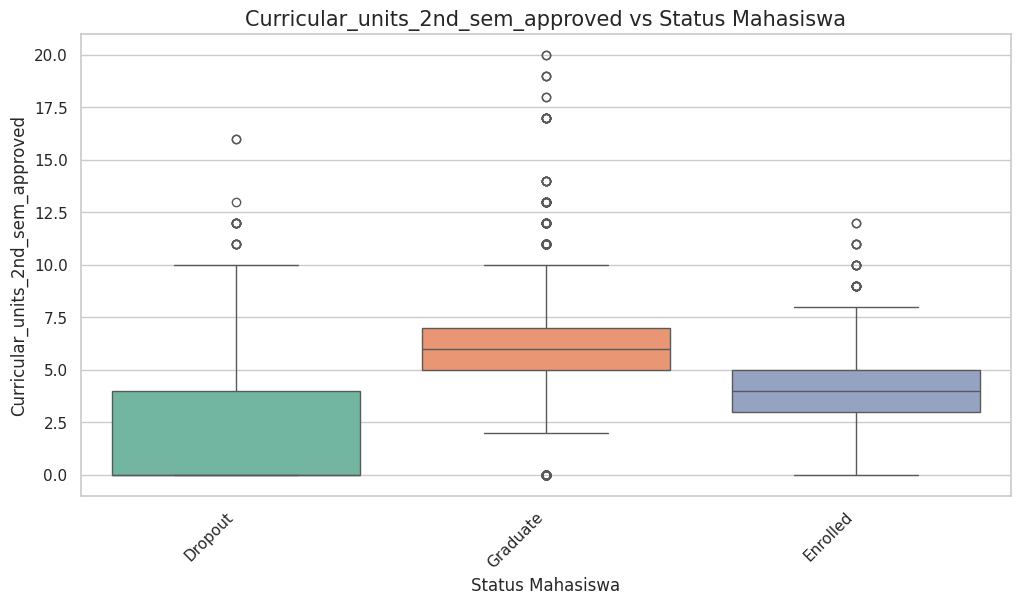

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


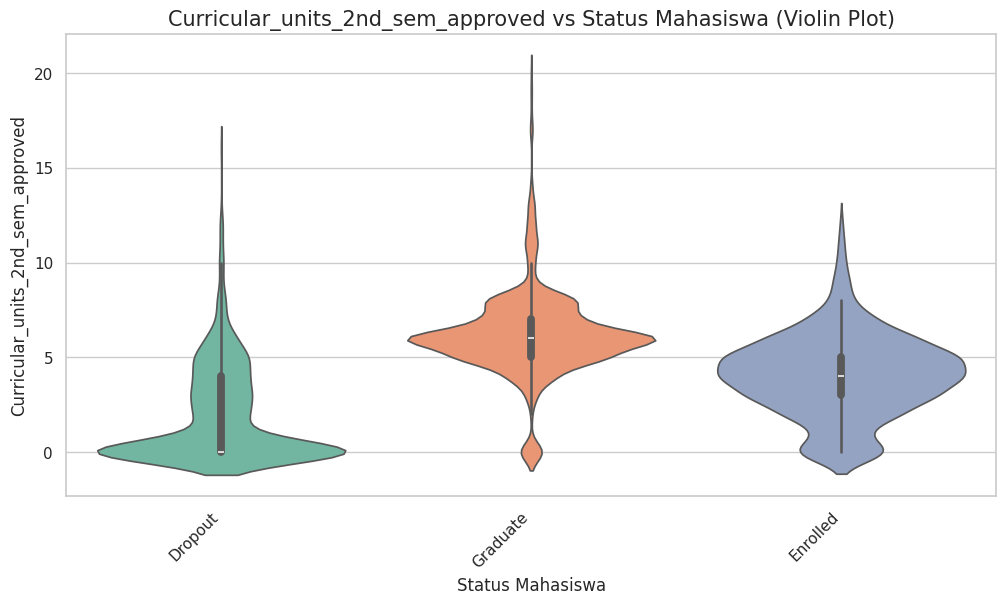

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


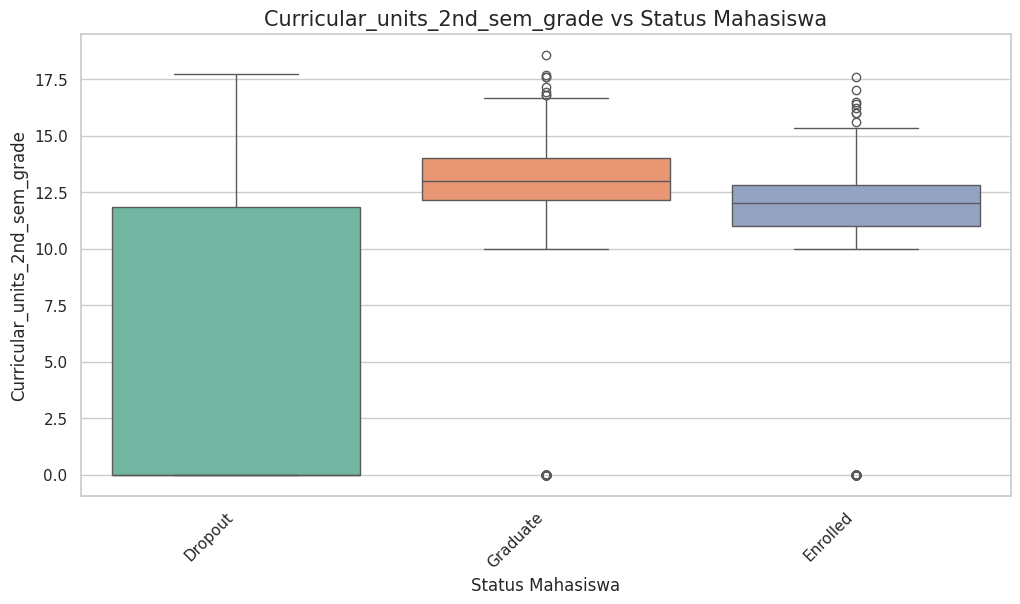

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


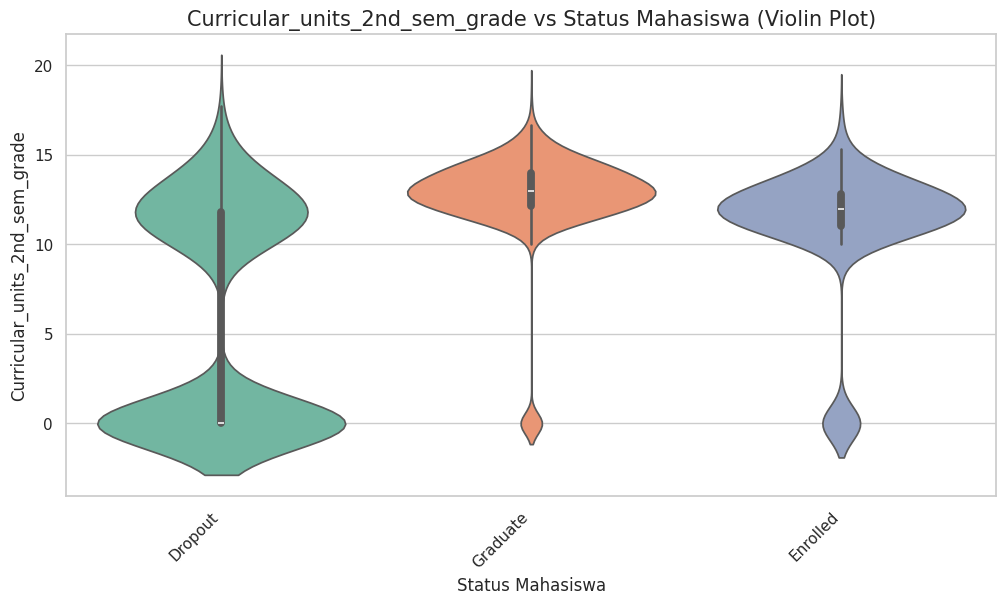

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


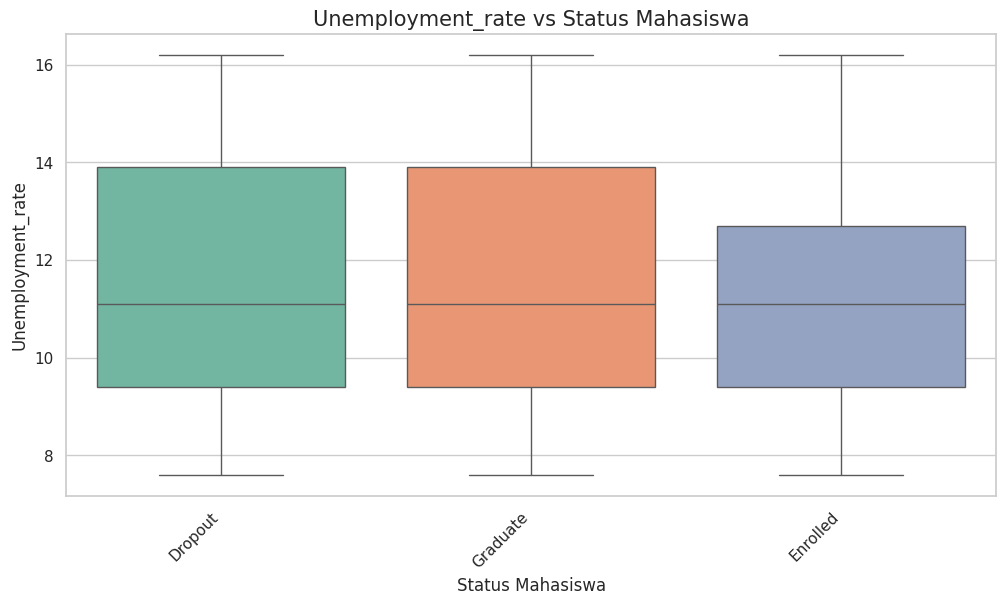

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


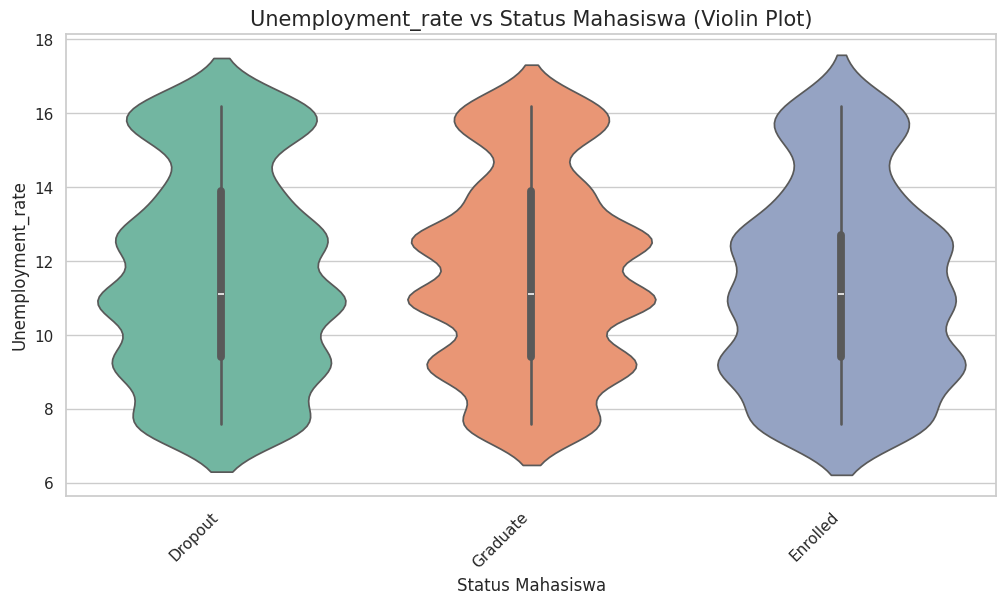

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


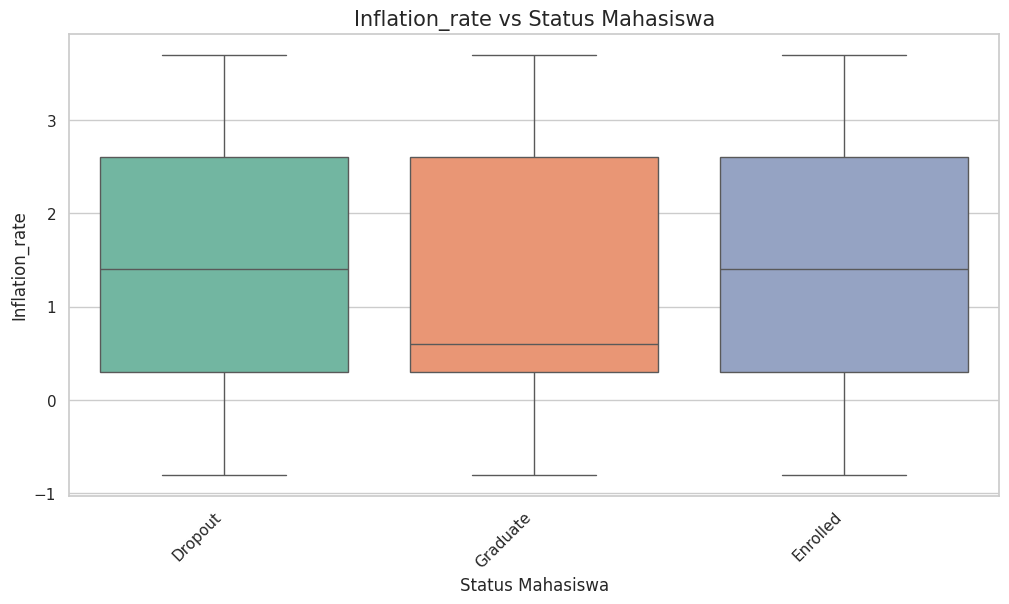

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


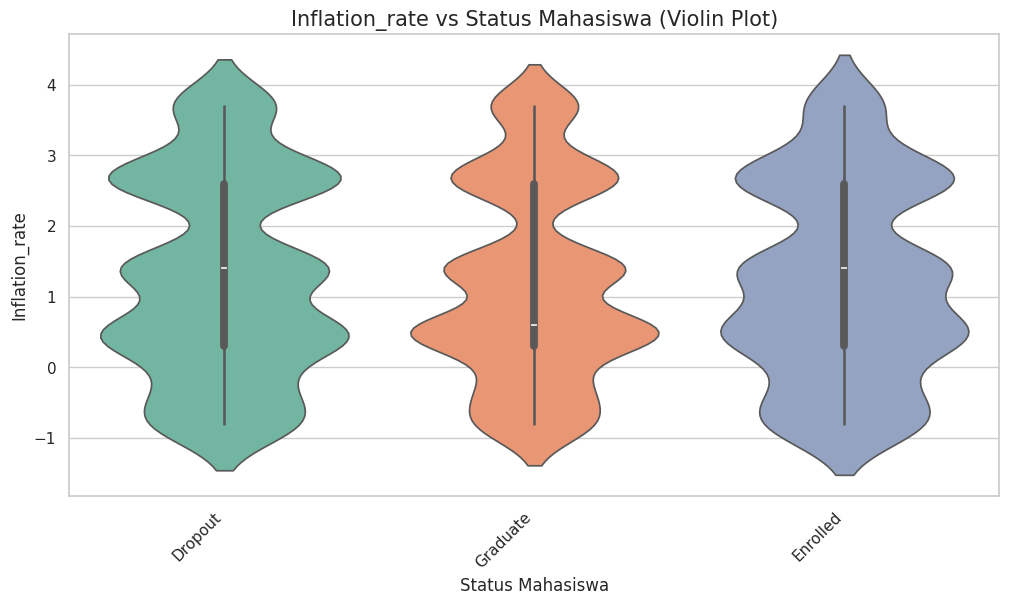

<ipython-input-15-f4bdeb73f78e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=df, palette="Set2")


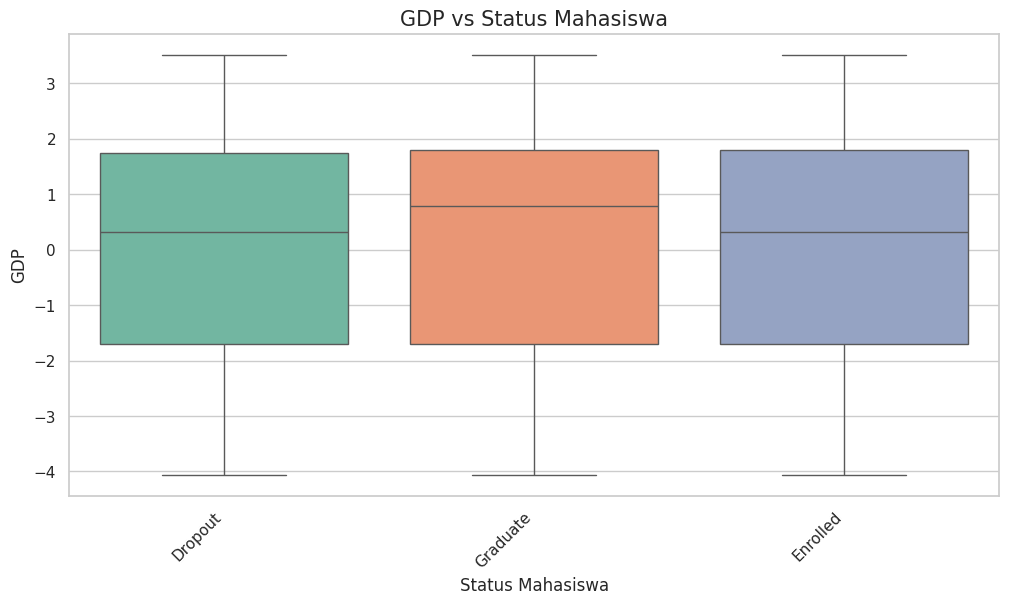

<ipython-input-15-f4bdeb73f78e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y=col, data=df, palette="Set2")


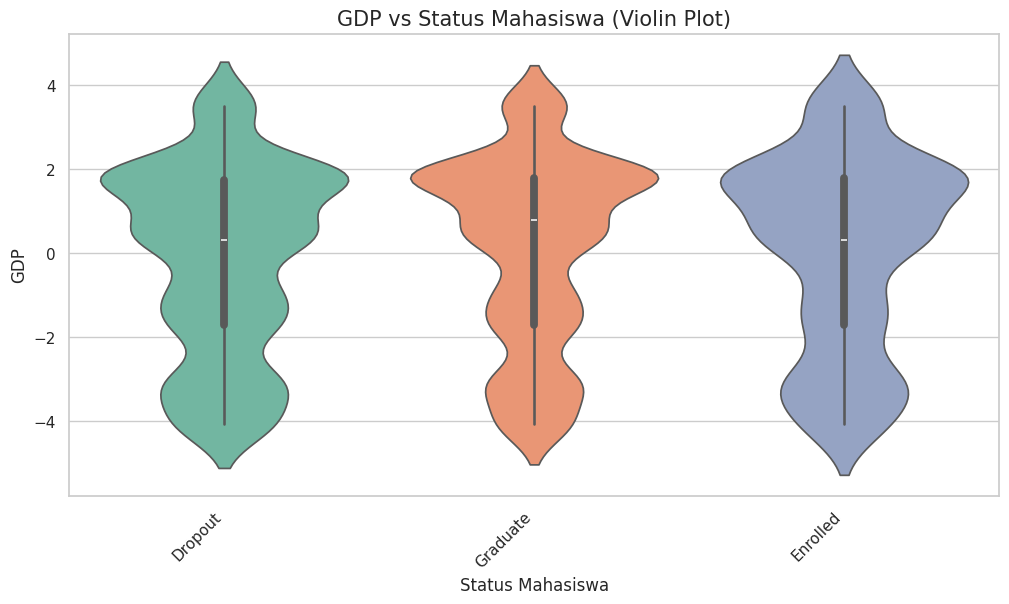

In [ ]:
if 'Status' in df.columns:
    for col in numerical_features_to_explore: # Menggunakan daftar fitur numerik dari atas
        if col in df.columns:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='Status', y=col, data=df, palette="Set2")
            plt.title(f'{col} vs Status Mahasiswa', fontsize=15)
            plt.xlabel('Status Mahasiswa', fontsize=12)
            plt.ylabel(col, fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.show()

            plt.figure(figsize=(12, 6))
            sns.violinplot(x='Status', y=col, data=df, palette="Set2")
            plt.title(f'{col} vs Status Mahasiswa (Violin Plot)', fontsize=15)
            plt.xlabel('Status Mahasiswa', fontsize=12)
            plt.ylabel(col, fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.show()
        else:
            print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")
else:
    print("Kolom 'Status' tidak ditemukan, analisis bivariat dengan target tidak dapat dilakukan.")

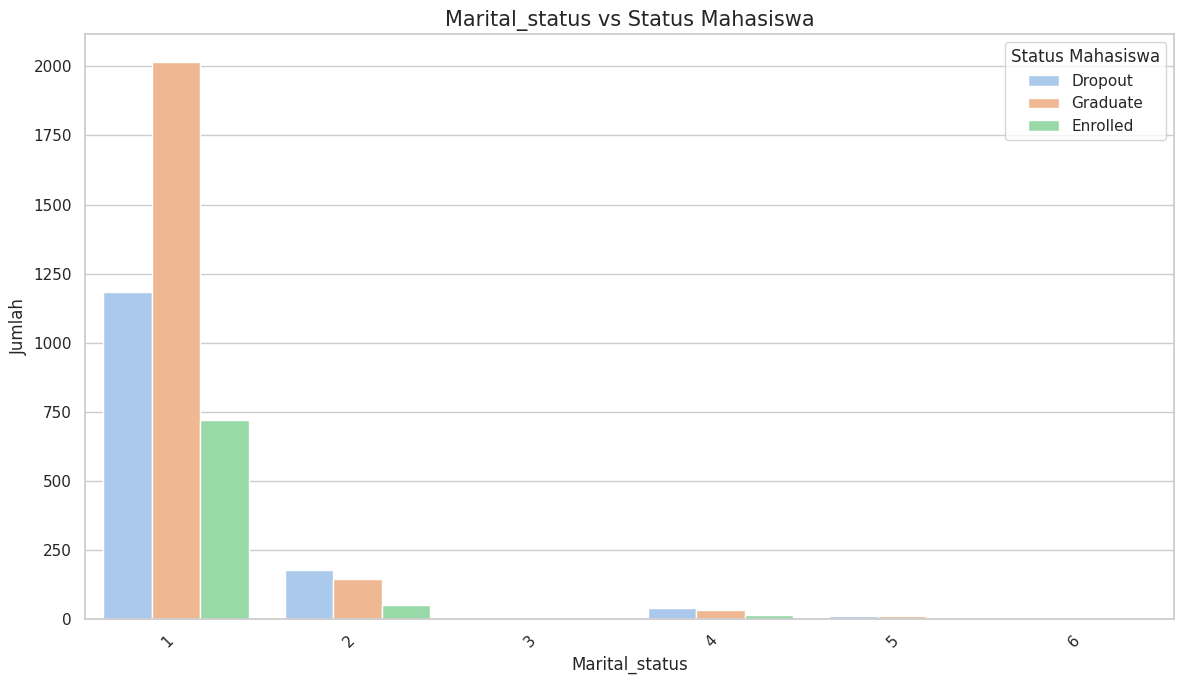

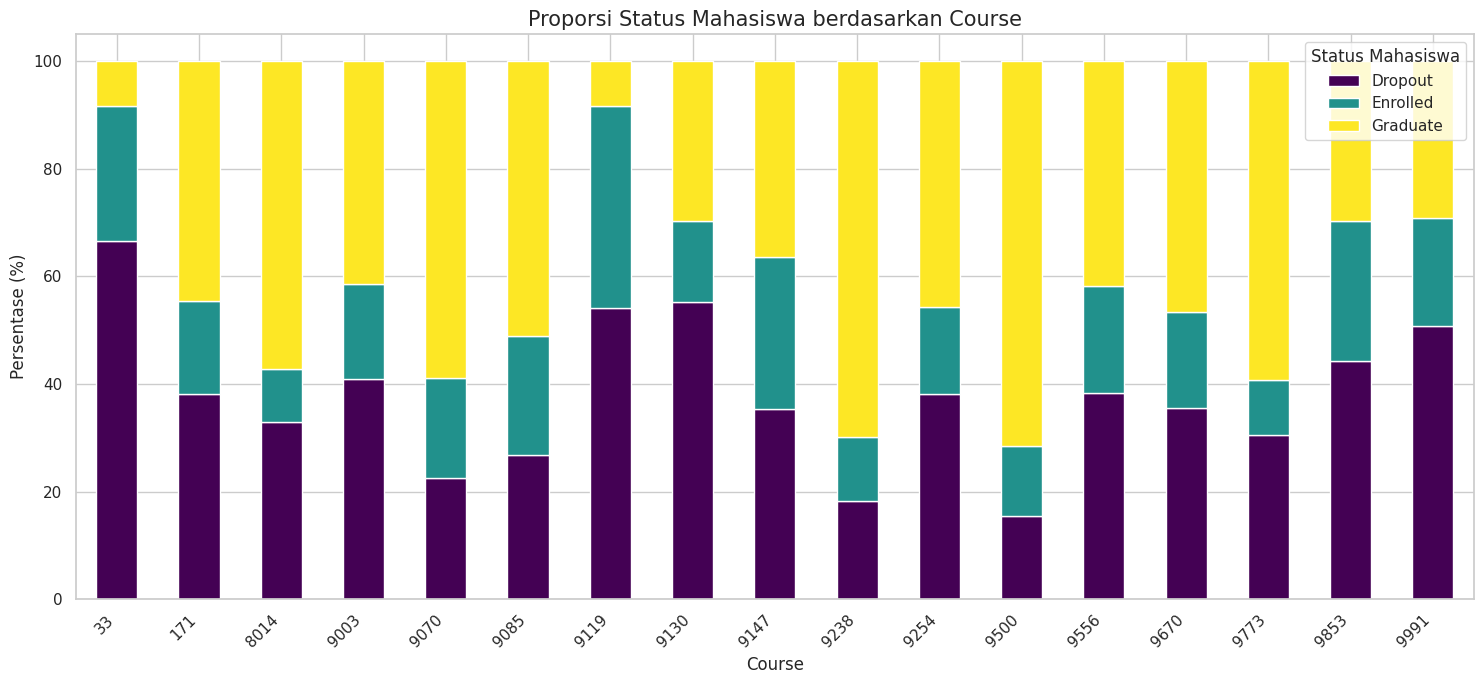

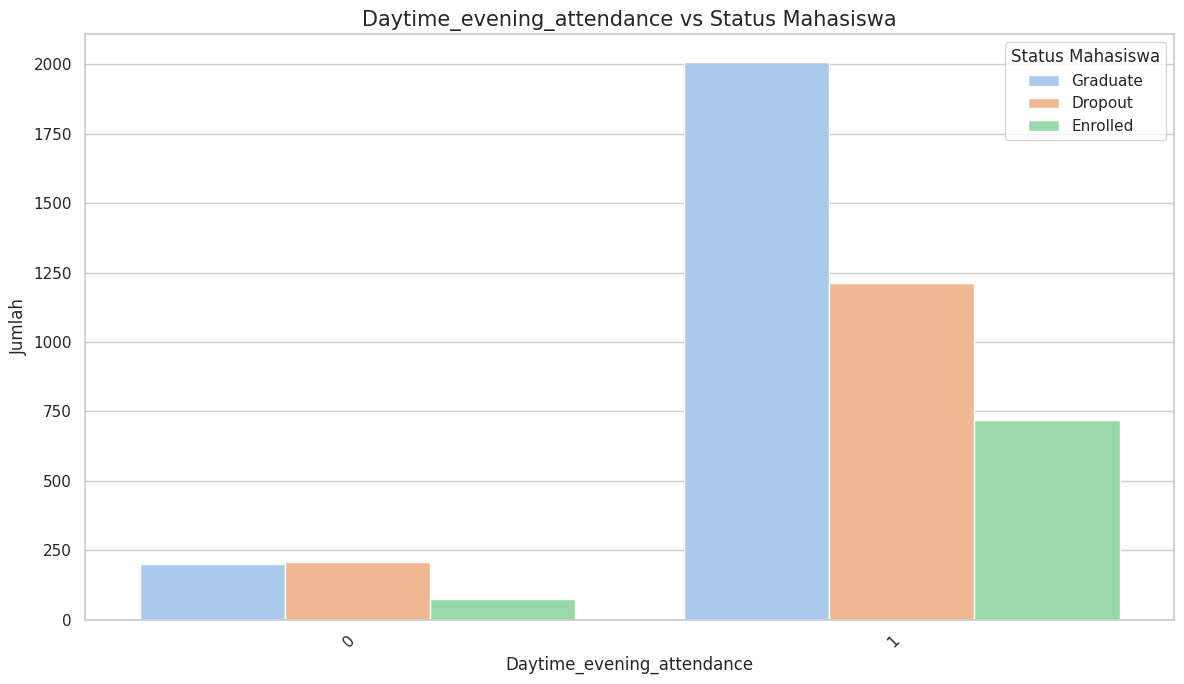

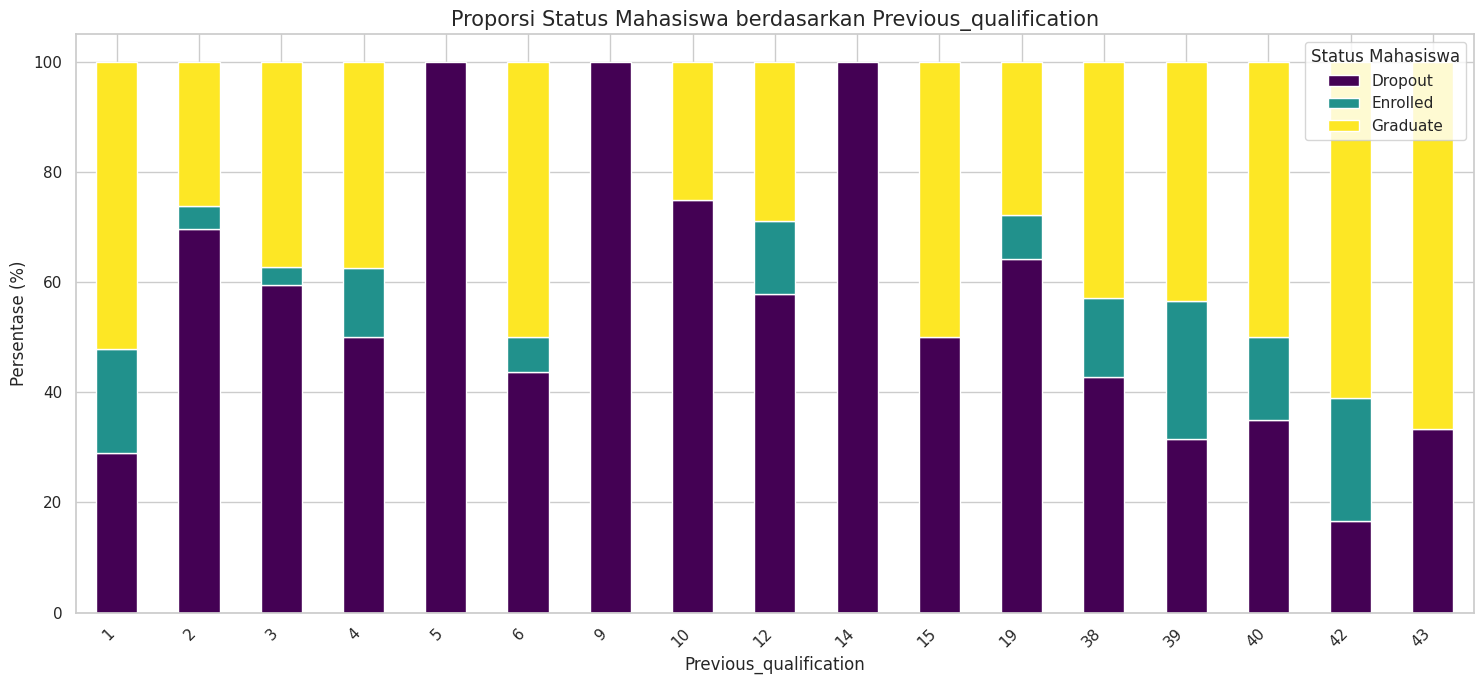

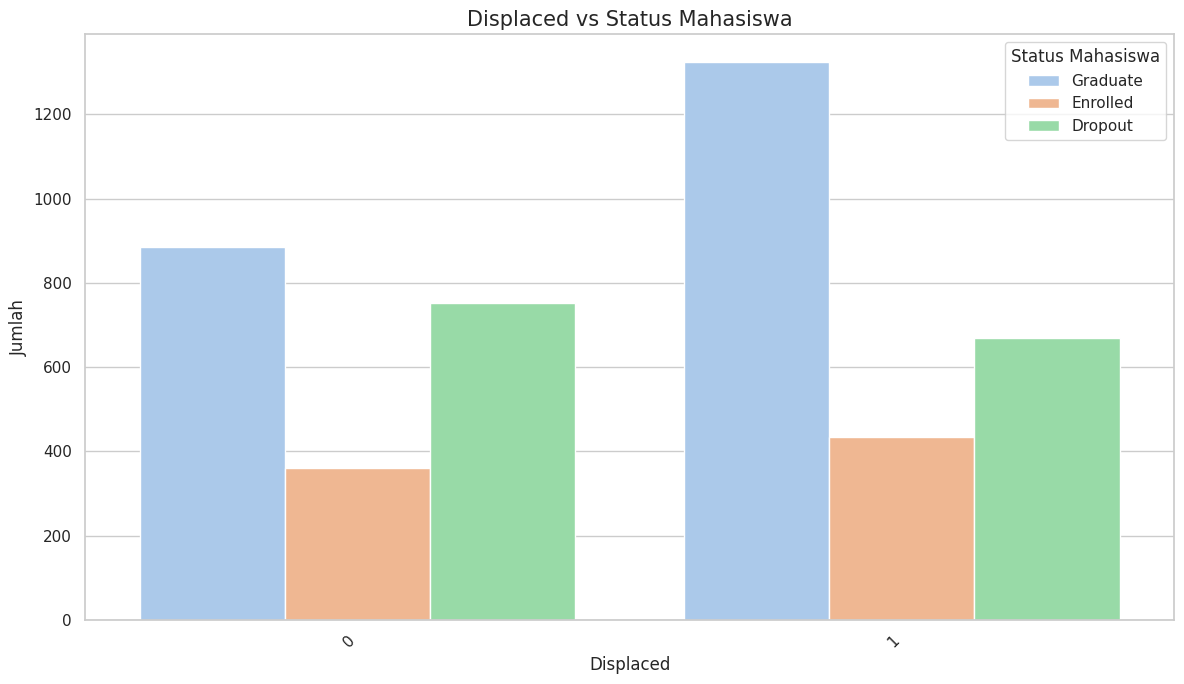

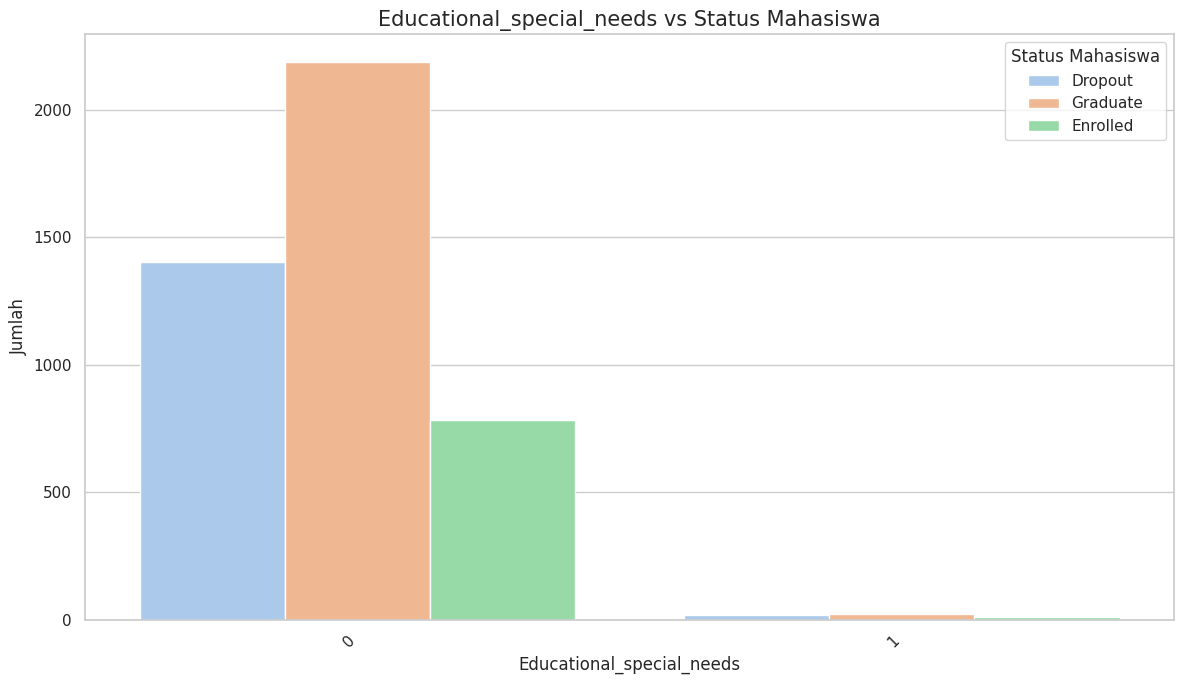

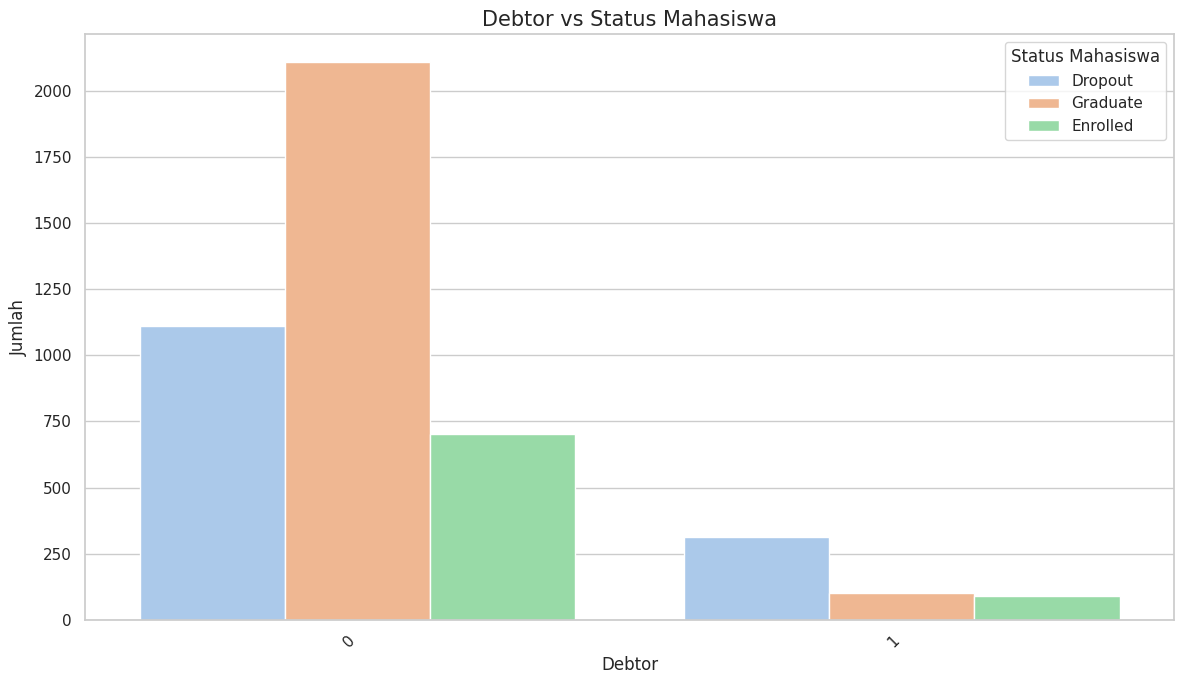

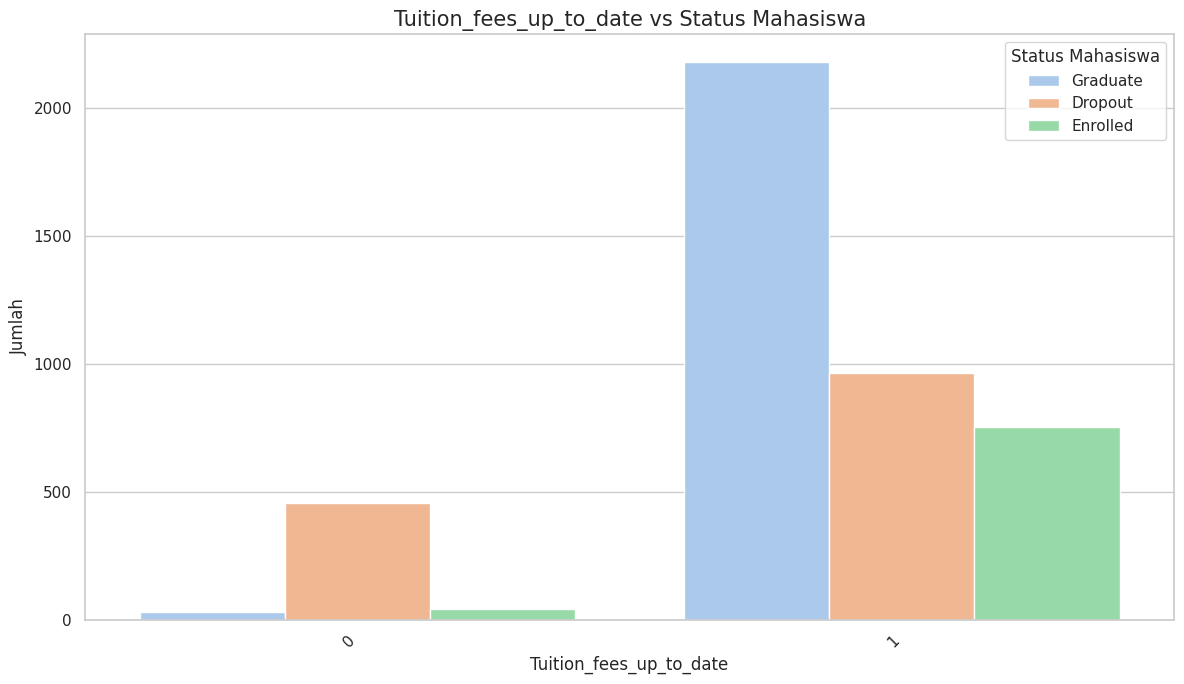

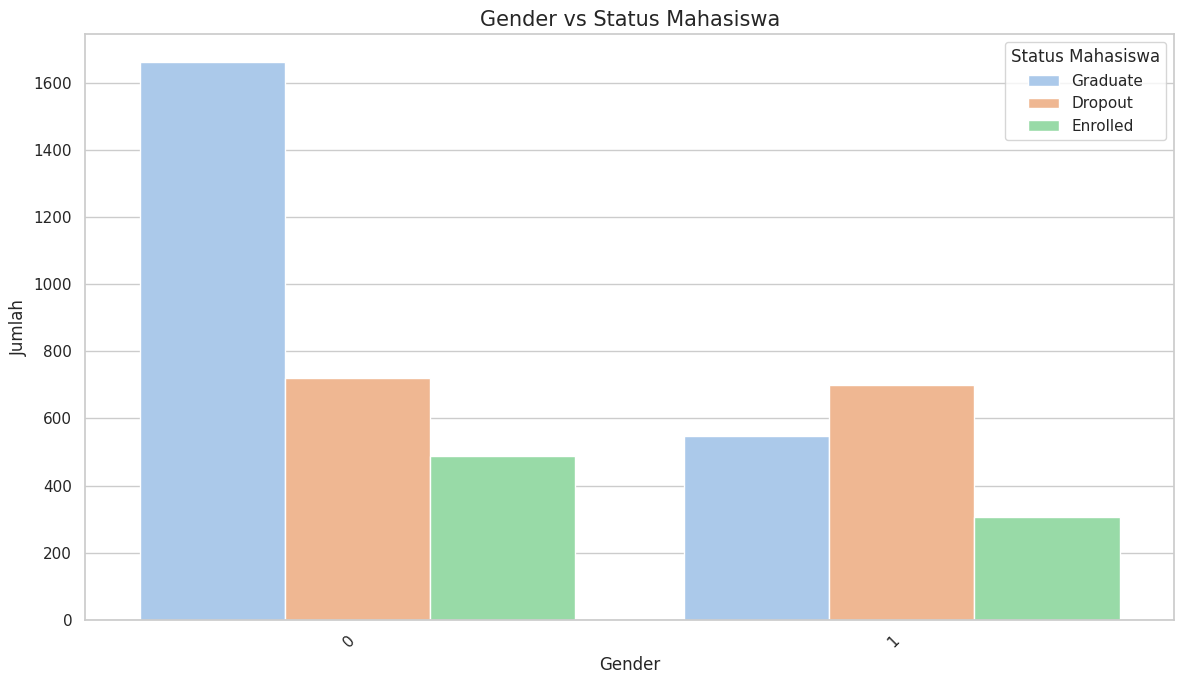

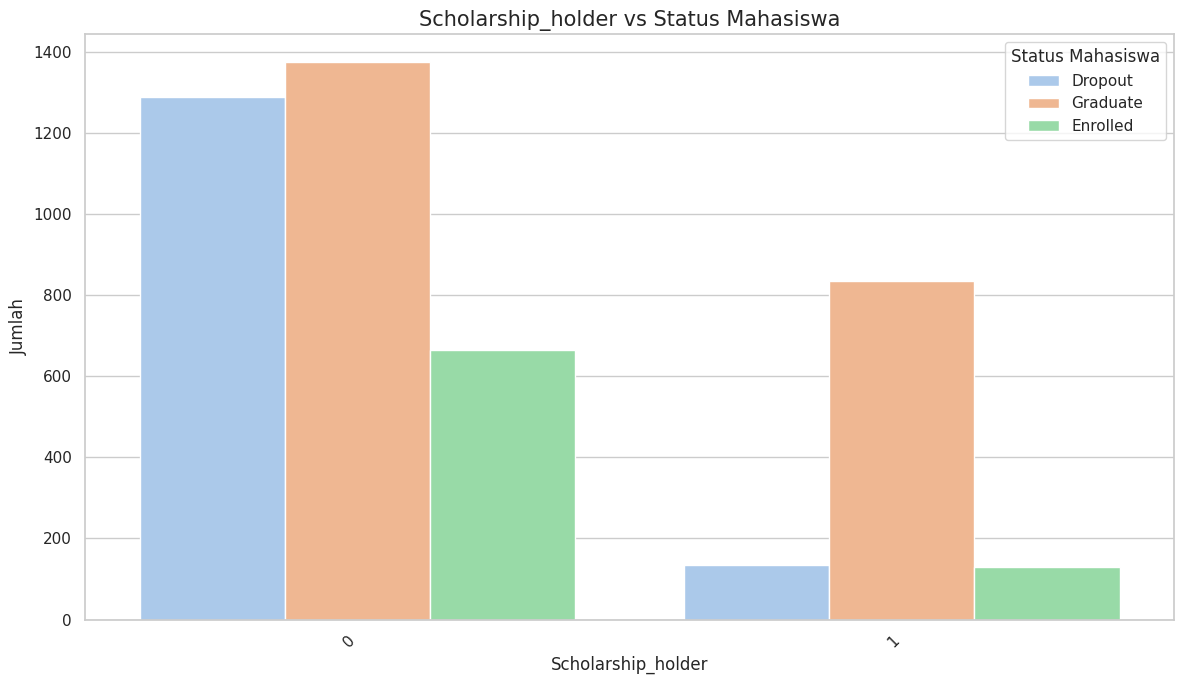

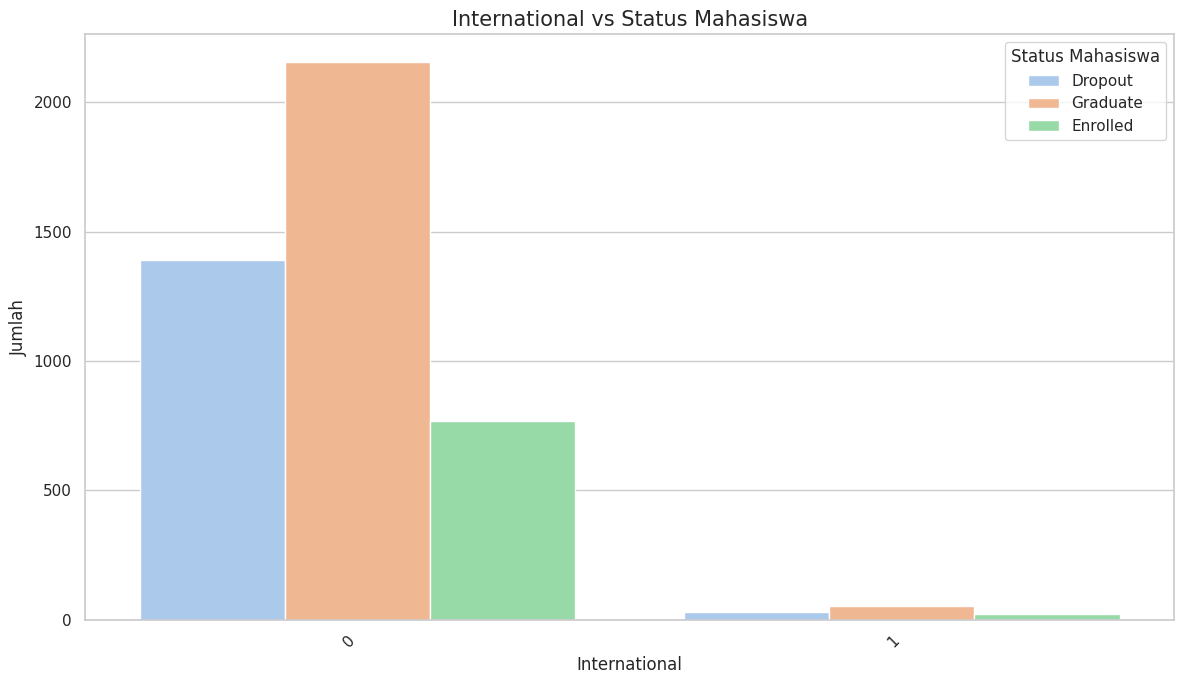

In [ ]:
if 'Status' in df.columns:
    for col in categorical_features_to_explore: # Menggunakan daftar fitur kategorikal dari atas
        if col in df.columns:
            # Hindari plot jika terlalu banyak kategori unik untuk menjaga kejelasan
            if df[col].nunique() < 10 or col in ['Gender', 'Tuition_fees_up_to_date', 'Scholarship_holder']: # Contoh beberapa kolom penting
                plt.figure(figsize=(12, 7))
                sns.countplot(x=col, hue='Status', data=df, palette="pastel")
                plt.title(f'{col} vs Status Mahasiswa', fontsize=15)
                plt.xlabel(col, fontsize=12)
                plt.ylabel('Jumlah', fontsize=12)
                plt.xticks(rotation=45, ha='right')
                plt.legend(title='Status Mahasiswa')
                plt.tight_layout()
                plt.show()
            # Untuk kolom dengan banyak kategori, bisa dipertimbangkan proporsi (stacked bar 100%)
            elif df[col].nunique() >=10 and df[col].nunique() < 20: # contoh untuk kolom dengan 10-20 kategori
                # Membuat tabel proporsi
                prop_df = df.groupby([col, 'Status']).size().unstack(fill_value=0)
                prop_df = prop_df.apply(lambda x: x*100/sum(x), axis=1)

                prop_df.plot(kind='bar', stacked=True, figsize=(15,7), colormap="viridis")
                plt.title(f'Proporsi Status Mahasiswa berdasarkan {col}', fontsize=15)
                plt.xlabel(col, fontsize=12)
                plt.ylabel('Persentase (%)', fontsize=12)
                plt.xticks(rotation=45, ha='right')
                plt.legend(title='Status Mahasiswa')
                plt.tight_layout()
                plt.show()
        else:
            print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")
else:
    print("Kolom 'Status' tidak ditemukan, analisis bivariat dengan target tidak dapat dilakukan.")

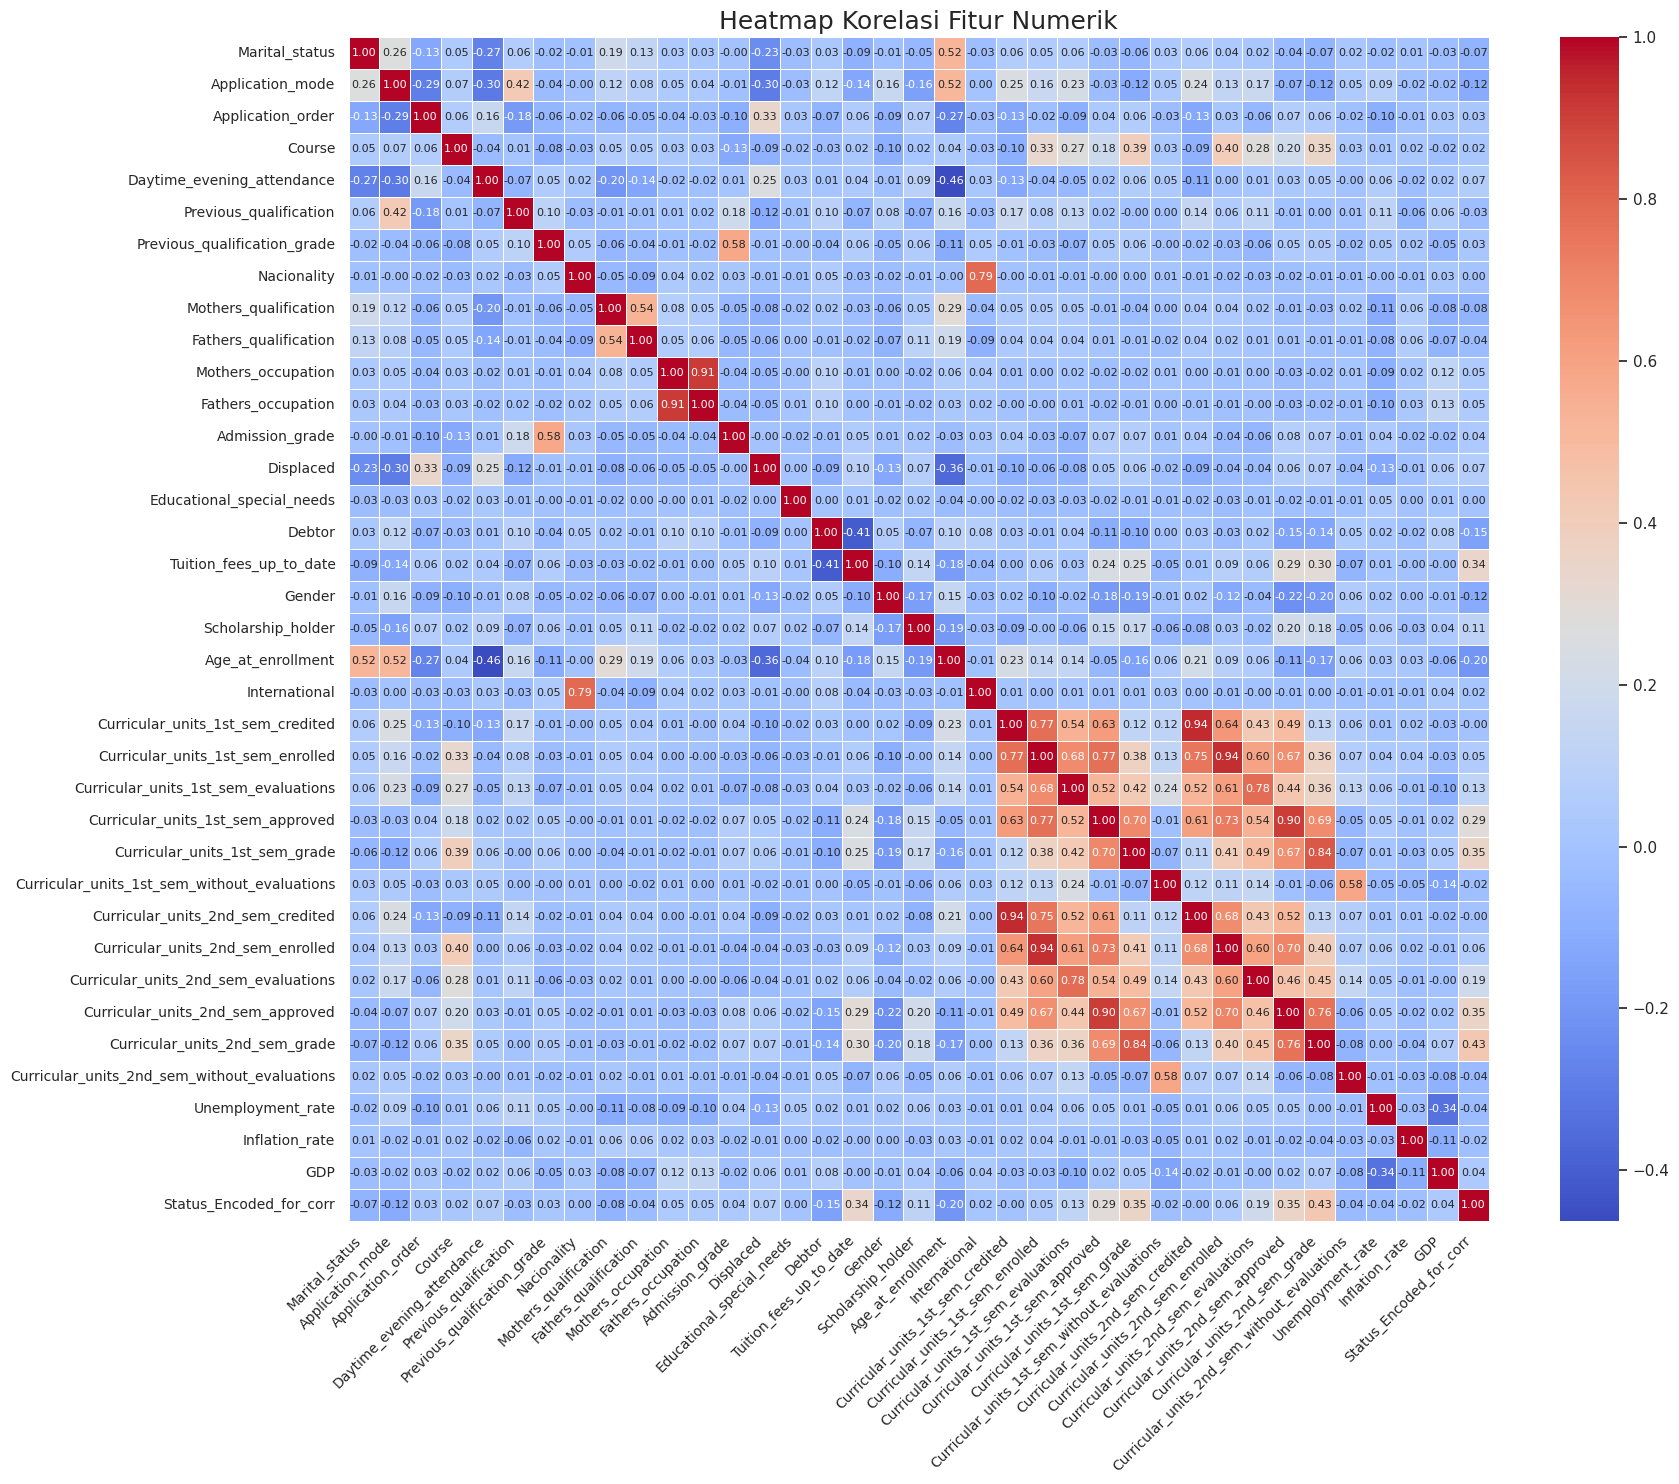

In [ ]:
# Jika Anda sudah membuat kolom 'Status_Encoded', Anda bisa memasukkannya juga
df_for_corr = df.copy()
if 'Status' in df_for_corr.columns and df_for_corr['Status'].dtype == 'object': # Jika 'Status' masih object
    if 'Status_Encoded' not in df_for_corr.columns: # dan belum ada Status_Encoded
         # Buat Status_Encoded jika belum ada (misalnya, jika EDA dilakukan sebelum encoding eksplisit)
        status_mapping_corr = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
        df_for_corr['Status_Encoded_for_corr'] = df_for_corr['Status'].map(status_mapping_corr)
        numerical_cols_for_corr = df_for_corr.select_dtypes(include=np.number).columns
    else: # Jika Status_Encoded sudah ada
        numerical_cols_for_corr = df_for_corr.select_dtypes(include=np.number).columns
elif 'Status_Encoded' in df_for_corr.columns: # Jika Status sudah encode dan ada
    numerical_cols_for_corr = df_for_corr.select_dtypes(include=np.number).columns
else: # Jika Status tidak ada atau bukan object, dan Status_Encoded tidak ada
    numerical_cols_for_corr = df.select_dtypes(include=np.number).columns


if len(numerical_cols_for_corr) > 1:
    plt.figure(figsize=(18, 15)) # Ukuran bisa disesuaikan
    correlation_matrix = df_for_corr[numerical_cols_for_corr].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Heatmap Korelasi Fitur Numerik', fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak cukup fitur numerik untuk membuat heatmap korelasi.")

<Figure size 640x480 with 0 Axes>

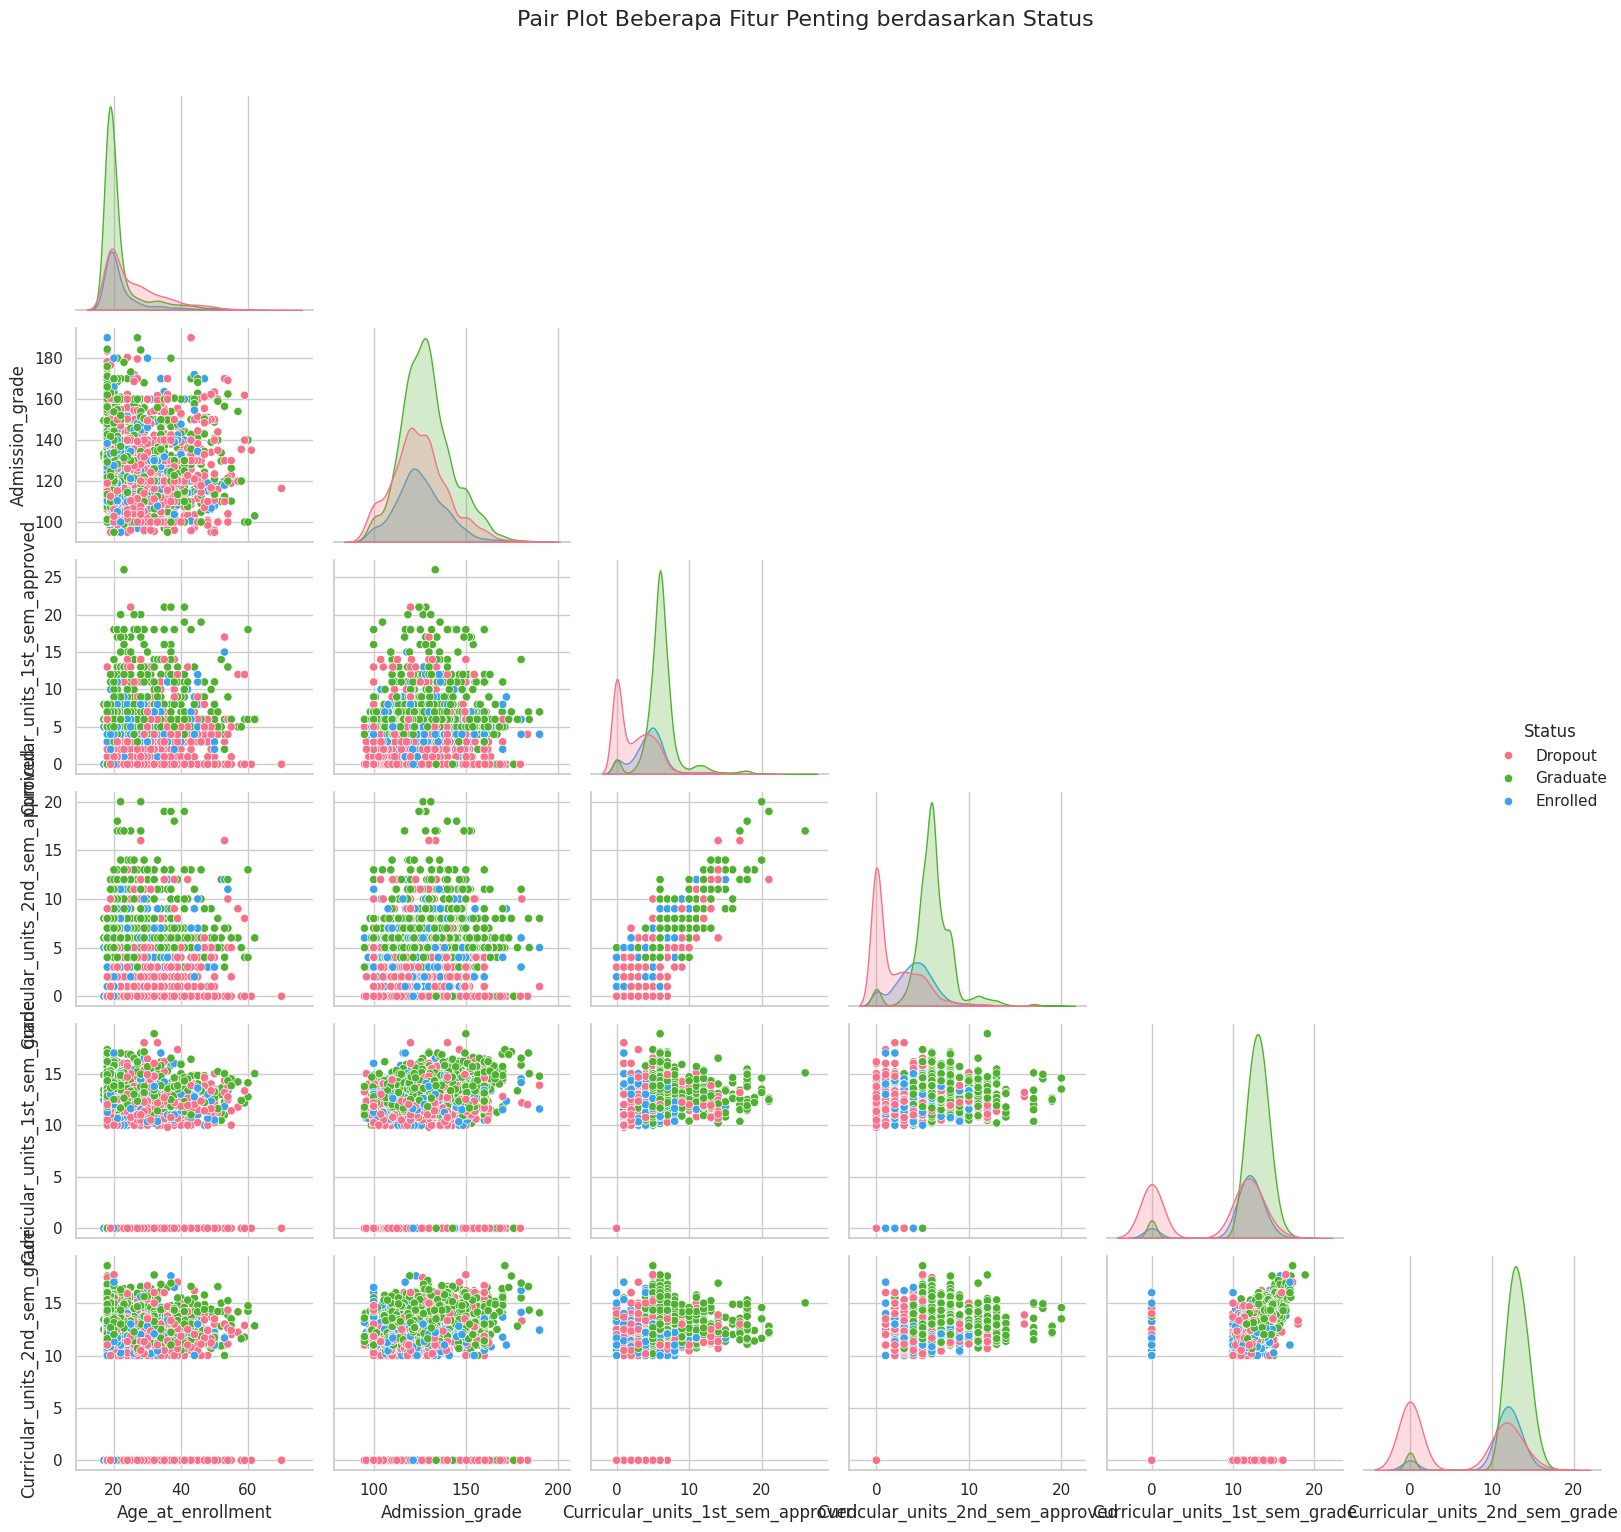

In [ ]:
# Terlalu banyak fitur akan membuat plot tidak terbaca.
pairplot_features = [
    'Age_at_enrollment', 'Admission_grade',
    'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
    'Status' # Kolom target asli (seaborn akan menangani encoding internal jika perlu untuk hue)
]

# Filter df agar hanya mengandung kolom yang ada dan kolom Status
existing_pairplot_features = [col for col in pairplot_features if col in df.columns]

if 'Status' in existing_pairplot_features and len(existing_pairplot_features) > 1 : # Pastikan Status ada dan ada fitur lain
    plt.figure() # Reset figure context
    sns.pairplot(df[existing_pairplot_features], hue='Status', palette="husl", diag_kind='kde', corner=True)
    plt.suptitle('Pair Plot Beberapa Fitur Penting berdasarkan Status', y=1.02, fontsize=16)
    plt.tight_layout() # Mungkin perlu disesuaikan atau dihapus jika suptitle bentrok
    plt.show()
else:
    print(f"Tidak dapat membuat pairplot. Pastikan 'Status' dan fitur lainnya ada di DataFrame dan daftar: {existing_pairplot_features}")

## Data Preparation / Preprocessing

In [ ]:
print("\n--- Data Preparation / Preprocessing ---")

# Mengatasi Missing Values
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
            mode_val = df[column].mode()[0]
            df[column] = df[column].fillna(mode_val)
            # print(f"Missing values in '{column}' (categorical) imputed with mode: {mode_val}.") # Dihilangkan agar tidak terlalu verbose
        elif pd.api.types.is_numeric_dtype(df[column]):
            median_val = df[column].median()
            df[column] = df[column].fillna(median_val)
            # print(f"Missing values in '{column}' (numerical) imputed with median: {median_val}.") # Dihilangkan

print("\nJumlah Missing Values setelah imputasi:")
if df.isnull().sum().sum() == 0:
    print("Tidak ada missing values yang tersisa.")
else:
    print(df.isnull().sum())


# Encoding Fitur Kategorikal
# Mapping kolom 'Status' ke numerik.
if 'Status' in df.columns:
    # Berdasarkan output sebelumnya, nilai unik adalah ['Dropout' 'Graduate' 'Enrolled']
    target_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
    df['Status_Encoded'] = df['Status'].map(target_mapping)

    if df['Status_Encoded'].isnull().any():
        print(f"Warning: Terdapat nilai NaN pada 'Status_Encoded' setelah mapping. Ini berarti ada nilai di 'Status' yang tidak ada di `target_mapping`. Nilai-nilai tersebut: {df[df['Status_Encoded'].isnull()]['Status'].unique()}")
        df.dropna(subset=['Status_Encoded'], inplace=True)
        df['Status_Encoded'] = df['Status_Encoded'].astype(int)
        print("Baris dengan Status_Encoded NaN telah dihapus dan kolom dikonversi ke integer.")

    y = df['Status_Encoded']
    X = df.drop(columns=['Status', 'Status_Encoded'])
else:
    print("Kolom 'Status' tidak ditemukan, pemodelan tidak dapat dilanjutkan.")
    exit()

# Identifikasi kolom kategorikal (yang bertipe 'object') dan numerik untuk X
categorical_cols_object = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

print(f"\nKolom Kategorikal (tipe object) di X yang akan di-OneHotEncode: {list(categorical_cols_object)}")
# print(f"Kolom Numerik di X awal (sebelum OneHotEncode): {list(numerical_cols)}") # Bisa di-uncomment jika perlu

# One-Hot Encoding untuk fitur kategorikal (yang bertipe 'object') di X
if not categorical_cols_object.empty:
    X = pd.get_dummies(X, columns=categorical_cols_object, drop_first=True, dummy_na=False)
    print("\nOne-Hot Encoding diterapkan pada kolom kategorikal (tipe object) di X.")
    print("Shape X setelah One-Hot Encoding:", X.shape)
else:
    print("\nTidak ada kolom kategorikal (tipe object) di X yang perlu di One-Hot Encode.")


# Scaling Fitur Numerik di X
numerical_cols_after_ohe = X.select_dtypes(include=np.number).columns

if len(numerical_cols_after_ohe) > 0:
    scaler = StandardScaler()
    X[numerical_cols_after_ohe] = scaler.fit_transform(X[numerical_cols_after_ohe])
    print("\nScaling (StandardScaler) diterapkan pada kolom numerik di X (setelah OHE).")
else:
    print("\nTidak ada kolom numerik di X untuk di-scaling (setelah OHE).")


# Pembagian Data menjadi Training dan Testing set
if not X.empty and 'y' in locals() and not y.empty:
    stratify_param = None
    if y.nunique() > 1 and y.value_counts().min() >= 2 :
        stratify_param = y
    else:
        print("Warning: Stratifikasi tidak dapat dilakukan karena jumlah kelas unik sedikit atau jumlah sampel per kelas kurang dari 2 untuk setidaknya satu kelas.")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=stratify_param)
    print(f"\nData berhasil dibagi: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
    print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")
else:
    print("X atau y kosong atau tidak terdefinisi. Tidak dapat melanjutkan ke pembagian data dan training.")
    exit()


--- Data Preparation / Preprocessing ---

Jumlah Missing Values setelah imputasi:
Tidak ada missing values yang tersisa.

Kolom Kategorikal (tipe object) di X yang akan di-OneHotEncode: []

Tidak ada kolom kategorikal (tipe object) di X yang perlu di One-Hot Encode.

Scaling (StandardScaler) diterapkan pada kolom numerik di X (setelah OHE).

Data berhasil dibagi: X_train shape: (3539, 36), X_test shape: (885, 36)
y_train distribution:
Status_Encoded
1    0.499294
0    0.321277
2    0.179429
Name: proportion, dtype: float64
y_test distribution:
Status_Encoded
1    0.499435
0    0.320904
2    0.179661
Name: proportion, dtype: float64


## Modeling

In [ ]:
print("Distribusi y_train sebelum SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42, k_neighbors=min(4, y_train.value_counts().min() -1 if y_train.value_counts().min() >1 else 1)) #k_neighbors harus lebih kecil dari jumlah sampel kelas minoritas

# Terapkan SMOTE hanya pada data training
# Cek dulu apakah ada kelas dengan sampel <= k_neighbors
if y_train.value_counts().min() > getattr(smote, 'k_neighbors', 5) : # default k_neighbors=5
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    print("\nDistribusi y_train setelah SMOTE:")
    print(y_train_smote.value_counts())

    # Latih model dengan data hasil SMOTE
    model_smote = RandomForestClassifier(
        n_estimators=100,
        max_depth=10, # Atau parameter lain yang sudah disesuaikan
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
        # class_weight='balanced' mungkin tidak lagi diperlukan atau bahkan bisa sedikit kontraproduktif setelah SMOTE,
    )
    model_smote.fit(X_train_smote, y_train_smote)
    print("\nModel RandomForestClassifier (dengan SMOTE) berhasil dilatih.")

Distribusi y_train sebelum SMOTE:
Status_Encoded
1    1767
0    1137
2     635
Name: count, dtype: int64

Distribusi y_train setelah SMOTE:
Status_Encoded
1    1767
0    1767
2    1767
Name: count, dtype: int64

Model RandomForestClassifier (dengan SMOTE) berhasil dilatih.


## Evaluation

In [ ]:
# Lakukan evaluasi pada X_test dan y_test (BUKAN X_train_smote, y_train_smote untuk evaluasi test)
print("\n--- Evaluasi Model dengan SMOTE pada Test Set ---")
y_pred_test_smote = model_smote.predict(X_test)
print(f"Accuracy on Test Set (SMOTE): {accuracy_score(y_test, y_pred_test_smote):.4f}")

# Menyiapkan nama target untuk classification_report
# Asumsi 'final_target_names' sudah didefinisikan sebelumnya, misalnya dari target_mapping
test_labels_present = sorted(y_test.unique())
current_test_target_names = [final_target_names[i] for i in test_labels_present if i < len(final_target_names)] if 'final_target_names' in locals() and final_target_names else [f'Class {i}' for i in test_labels_present]

if len(current_test_target_names) != len(test_labels_present): # Fallback jika jumlah nama target tidak sesuai
    current_test_target_names = [f'Class {i}' for i in test_labels_present]

print(classification_report(y_test, y_pred_test_smote, labels=test_labels_present, target_names=current_test_target_names, zero_division=0))


--- Evaluasi Model dengan SMOTE pada Test Set ---
Accuracy on Test Set (SMOTE): 0.7525
              precision    recall  f1-score   support

     Dropout       0.84      0.69      0.76       284
    Graduate       0.83      0.88      0.85       442
    Enrolled       0.44      0.50      0.47       159

    accuracy                           0.75       885
   macro avg       0.70      0.69      0.69       885
weighted avg       0.76      0.75      0.75       885



In [ ]:
print("\n--- Save Model ---")
model_dir = 'model'

# Membuat direktori 'model' jika belum ada
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Direktori '{model_dir}' berhasil dibuat.")

# Menyimpan model utama
model_filename = os.path.join(model_dir, 'student_status_classifier.joblib') # Nama model disesuaikan
joblib.dump(model, model_filename)
print(f"Model berhasil disimpan sebagai '{model_filename}'")

# Menyimpan scaler jika ada
if 'scaler' in locals() and isinstance(scaler, StandardScaler):
    scaler_filename = os.path.join(model_dir, 'scaler_status.joblib') # Nama disesuaikan
    joblib.dump(scaler, scaler_filename)
    print(f"Scaler berhasil disimpan sebagai '{scaler_filename}'")

# Menyimpan daftar kolom training (fitur)
trained_columns_filename = os.path.join(model_dir, 'trained_columns_status.joblib') # Nama disesuaikan
# Pastikan X_train.columns adalah list atau bisa dikonversi ke list
joblib.dump(list(X_train.columns), trained_columns_filename)
print(f"Kolom training (fitur) berhasil disimpan sebagai '{trained_columns_filename}'")

# Menyimpan mapping target jika ada
if 'target_mapping' in locals():
    target_mapping_filename = os.path.join(model_dir, 'target_mapping_status.joblib') # Nama disesuaikan
    joblib.dump(target_mapping, target_mapping_filename)
    print(f"Target mapping berhasil disimpan sebagai '{target_mapping_filename}'")


--- Save Model ---
Model berhasil disimpan sebagai 'model/student_status_classifier.joblib'
Scaler berhasil disimpan sebagai 'model/scaler_status.joblib'
Kolom training (fitur) berhasil disimpan sebagai 'model/trained_columns_status.joblib'
Target mapping berhasil disimpan sebagai 'model/target_mapping_status.joblib'
